In [18]:
# LOAD PACKAGES

# Package names
packages <- c("tidyverse", "reshape2", "class", "effects", "boot")

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Packages loading
invisible(lapply(packages, library, character.only = TRUE))

# Job Quality Indicators and the American Workforce

## Motivation

This study is motivated by the desire to actively learn more about the American workforce through the application of data science models, methods, and principles.

For the average American, life has only gotten worse. Income inequality has risen at dramatic rates as unions were disemboweled, leaving workers to beg alone (and uselessly) for higher salaries; various regulations, including Glass Steagle were rolled back; taxation for the wealthiest Americans decreased. As a result, the middle class has been hollowed out, and the majority of the Americans find themselves on the middle of an island in the bell curve. To their left lie the poor, and to their right lie the upper middle class and the wealthy; and they are less likely than ever to become wealthier, and liklier than ever to become poorer.

Wealth is largely measured as the sum of one's assets, and is not largely correlated with income. (PK, 2021) Net worth is the most common measure (described previously) of wealth, and is "a function of inheritance, past levels of disposable income, the propensity to save, and the return on investments." It is "difficult or impossible" to measure these factors in a household survey, hence the lack of models that consider causality and wealth. (Lamas and McNeil, 1985). 

In lieu of such an indicator, household income suffices as a point of reference for economic classification and relative economic clout.

A no-brainer correlate would then be income; naturally, there is likely to be a strong and significant correlation between the two. However, in the interest of breaking these things down to a more human level, one could also use pay rate (pay/hour).

Pay rate is important in that it represents how much your work is worth; is your work worth $\$3,200$ a month or $20 an hour? The monthly estimate helps us make sense of how much our labor can pay for, and is also robust in terms of comparing it to someone else. The most digestible, however, is pay rate as an hourly wage. Calculating something, even hypothetically (e.g., salaries), as an hourly pay rate, has one key benefit: it reduces the final estimate, which makes rates easier to compare against each other.

For our first hypothesis, household income was used to predict pay rate. Unsurprisingly, there is a very strong correlation between pay rate and income class. Most importantly, this model can be used to roughly classify how stark the differences between the classes.

For the data scientist, it is critical that data is systematically, reliably processed. Understanding how this data came to be (e.g., the sampling methods and interview methodologies of the census, the processing of the data in this study itself) is as critical as what the models show us. One of the key metamotivational factors of this study is the desire to accurately convey how it came to its conclusions.

## Scope

This study is concerned with the conditions of the American working class. For the purposes of this study, working class is synonymous with wage earner. More specifically, a member of the working class is someone whose income comes primarily from wages.

If one were to draw a distinction between the working class and the capital-owning class (people who make most of their money through labor vs. people who make most of their money through capital gains), it would be: if this person lost their job tomorrow, would they be able to rely on their capital investments to not work for an extended period of time? If the answer is no, they are working class. If the answer is yes, they are not. This is a rough qualitative description of the classes at best, but helps to illustrate the position of wage earners by contrasting them to capital earners.

The scope of this study is to describe relationships between positive job quality indicators and current job outcome.

### Pay Rate

This study is primarily concerned with differences in pay rate between different classes of people (based on household income, education, job class, etc.).

Pay rate is calculated as a function of income earned per week divided by hours worked per week:

$$ \text{weekly pay rate} =  \dfrac{income}{hours}$$

Pay rate describes, essentially, how much money an individual makes per hour, regardless of whether they are paid hourly. This allows us to view the overall trend between the categories, and also provides a point of comparison between employees who are paid hourly and those who receive a salary.

Note that there is a very large difference between the pay rates of hourly and salaried employees: salaried employees systematically receive a higher pay rate.

## Data Auditing and Cleansing

Data was filtered to more accurately approximate the population of interest, Americans who earn the majority of their income through wages or salaries.

## Hypotheses

### Hypothesis 1: the income class-only hypothesis

Pay rate is a measure of hourly income. Economic class, which this study simplifies into lower, upper, and middle economic class, is determined by adjusted household income. Classification is detemined by the adjusted income of a household relatice to the median adjusted household income of the sample.

Economic mobility in the United States it at a historic low. (Citation needed) Research indicates that the quality of a current individual's job is greatly determined by that individual's starting wealth, which can be used to capitalize on networking and other opportunities that require capital investment that is easier to achieve for individuals with higher starting capital. (Citation needed)

Hypothesis 1 posits that the pay rate of working Americans is explained to a great degree by current income class.
1. Lower-income status is associated with the least pay rate.
2. Upper-income status is associated with the highest pay rate.

This hypothesis is likely to be true due to the causal relationship between job income and household income. For one-person households, or households where one individual earns a the majority of income, the job income of that individual will largely determine their household, and therefore their income class.

If hypothesis 1 is true, it indicates that your current pay rate is strongly related to the income of the household you belonged to last year (household income is actually a measure of the previous year's household income).

#### Hypothesis 1: functional form

$$f(x) = \beta_{0} + \beta_{middle-income}X_{middle-income} + \beta_{upper-income}X_{upper-income} +\epsilon_{income}, $$

Where $\beta_{0}+\epsilon_{income}$ is the baseline term and represents the coefficient estimate for lower-income people.

[1] 0.000 0.025 0.050 0.075 0.100 0.125 0.150 0.175 0.200 0.225 0.250 0.275
[13] 0.300 0.325 0.350 0.375 0.400 0.425 0.450 0.475

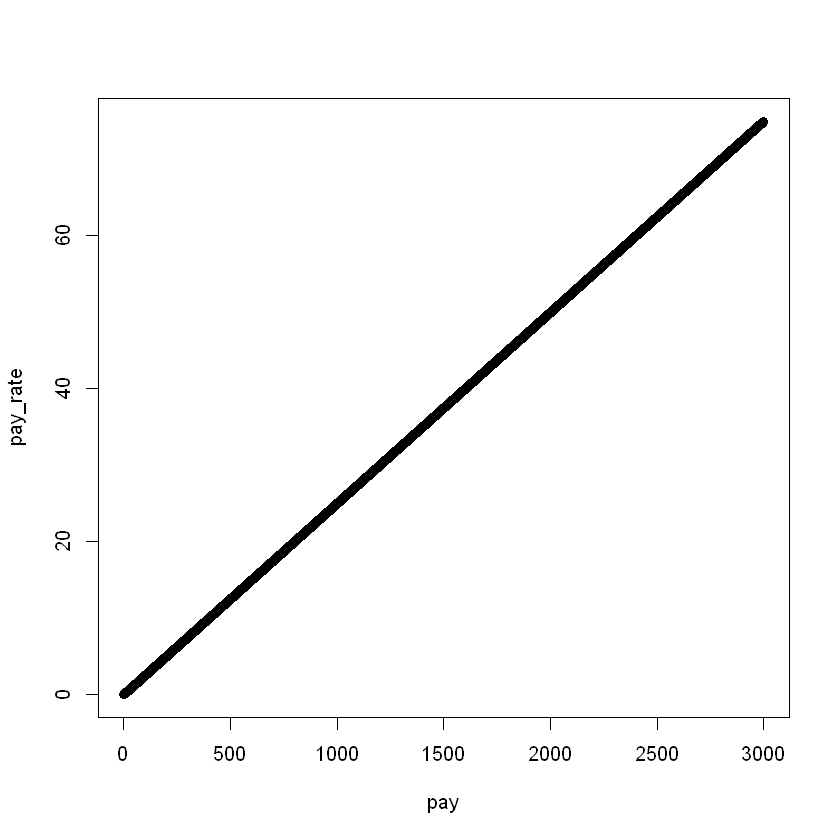

In [19]:
pay  <- seq(0, 3000, 1)
hrs  <- 40
pay_rate  <- pay/hrs
head(pay_rate, 20)
plot(y = pay_rate, x = pay)

The pay rate, given that $hours = 40$ is modeled by the equation $f(x) = \beta{x}$ where $\beta{} = .025 \text{ USD}$ (2.5 cents). Therefore, the pay rate of people who make more money will always be higher than that of those who make less money.

# Variables Considered

## Description
A list of every variable consulted during all stages of data analysis. 

## Purpose
I included this list to maximize transparency and reproducibility.

### Identifiers and Flags

`H_SEQ` Household Identifier

`PPPOS` Unique person identifier

  When used together,`H_SEQ` and `PPPOS` can be combined to create an identifier that is unique to a person's household and family. These variables are kept for future model fitting and testing etc.

`A_CIVLF` Civilian Labor Force 

  Select "1" to exclude all people in armed forces to reduce variance.

 * 0 = NIU
 * 1 = In universe

`PRERELG` Earning eligibility flag

  Defines a person as "Earnings-Eligible." (whether the total household earns below a certain amount of money. This can be calculated by taking PRERELG == 1 for the whole population (out of an abundance of caution) and determining the maximum value.)
  
 * 0 = No
 * 1 = Yes
  
### Employment

`A_FTLF` Full time labor force

 * 0 = NIU
 * 1 = FTLF

`PEMLR` Major Labor Force Category

  * 0 = NIO
  * 1 = Employed, at work
  * 2 = Employed, absent
  * 3 = Unemployed - on layoff
  * 4 = Unemployed - looking
  * 5 = Not in labor force - retired
  * 6 = Not in labor force - disabled
  * 7 = Not in labor force - other

`A_EXPLF` Experienced labor force

  Definition: has this person worked a job before? 0 = No, 1 = Yes

  * 0 = Not in experienced labor force
  * 1 = Employed
  * 2 = Unemployed

`A_PAYABS` Pay for time off

 * 0 = Not in universe/children and Armed Forces
 * 1 = Yes
 * 2 = No
 * 3 = Self-employed

`PRDISC` Discouraged worker

 * 0 = NIU
 * 1 = Discouraged worker
 * 2 = Conditionally interested
 * 3 = Not available

`A_HRS1` Hours worked last week at all jobs

 * -1 = Not in universe
 * 00 = Children and Armed Forces
 * 01-99 = Number of hr

`PEHRUSLT` Hours worked last week

  Note: Measure added after Hypothesis 2.

 * -4 = Hours vary
 * -1 = NIU - adult civilian
 * 000 = NIU - children or Armed Forces or no hours
 * 1-198 = # of hours

`A_GRSWK` Gross Weekly pay

  The amount an individual makes at one of their jobs (ASEC dictionary phrasing: "this job") prior to deductions.

  Note: Measure added after Hypothesis 2.
  
 * 0000 = NIU/Children or armed forces
 * 0001-2885 = Dollar amount
  
`PRUNTYPE` On the job, is X covered by a union association/contract?
 * 0 = Not in universe or children and Armed Forces
 * 1 = Yes
 * 2 = No
  
`A_UNCOV` On the job, is X covered by a union association/contract?
 * 0 = Not in universe or children and Armed Forces
 * 1 = Yes
 * 2 = No
  
### Poor Job Outcome

`PRUNTYPE` Reason for unemployment
  
  * 0 = NIU
  * 1 = Job loser/on layoff
  * 2 = Other job loser
  * 3 = Temporary job ended
  * 4 = Job leaver
  * 5 = Re-entrant
  * 6 = New-entran

`PRDISC`
  
  Discouraged worker code
  
 * 0 = NIU
 * 1 = Discouraged worker
 * 2 = Conditionally interested
 * 3 = Not available

### Demographic characteristics

`A_HGA`

  Highest Level of Education Achieved
  
 * 0 = Children
 * 31 = Less than 1st grade
 * 32 = 1st,2nd,3rd,or 4th grade
 * 33 = 5th or 6th grade
 * 34 = 7th and 8th grade
 * 35 = 9th grade
 * 36 = 10th grade
 * 37 = 11th grade
 * 38 = 12th grade no diploma
 * 39 = High school graduate - high school diploma or
  equivalent
 * 40 = Some college but no degree
 * 41 = Associate degree in college - occupation/vocation
  program
 * 42 = Associate degree in college - academic program
 * 43 = Bachelor's degree (for example: BA,AB,BS)
 * 44 = Master's degree (for example:
  MA,MS,MENG,MED,MSW, MBA)
 * 45 = Professional school degree (for example:
  MD,DDS,DVM,LLB,JD)
 * 46 = Doctorate degree (for example: PHD,EDD)

`PRDTRACE` Race

  Kept for potential data visualization applications
  
 * 01 = White only
 * 02 = Black only
 * 03 = American Indian, Alaskan Native only (AI)
 * 04 = Asian only
 * 05 = Hawaiian/Pacific Islander only (HP)
 * 06 = White-Black
 * 07 = White-AI
 * 08 = White-Asian
 * 09 = White-HP
 * 10 = Black-AI
 * 11 = Black-Asian
 * 12 = Black-HP
 * 13 = AI-Asian
 * 14 = AI-HP
 * 15 = Asian-HP
 * 16 = White-Black-AI
 * 17 = White-Black-Asian
 * 18 = White-Black-HP
 * 19 = White-AI-Asian
 * 20 = White-AI-HP
 * 21 = White-Asian-HP
 * 22 = Black-AI-Asian
 * 23 = White-Black-AI-Asian
 * 24 = White-AI-Asian-HP
 * 25 = Other 3 race comb.
 * 26 = Other 4 or 5 race comb.

# Important numeric constants

- Seed: 666

In [20]:
#SETTING SEED
set.seed(666) #Set seed at the beginning of the notebook, once.

In [21]:
# SET INITIAL WORKING DIRECTORY
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/March 2022 CPS Data")

In [22]:
# LOAD DATA
person  <- read.csv("pppub22.csv")

# Initial Data Cleaning

The initial dataset has been optimized to store data in a wide table format. The initial dataset has a *p* of ~8,600: too many variables to reasonably model together, not that anyone should be interested in such a fool's errand to begin with.

Many of the variables in this dataset have categorical values that denote exclusion from that variable's universe. It is important to consider this.

## Filter out children, armed forces

Children and armed forces add additional unwanted variance to an already highly complex dataset. The scope of these analyses is to consider the impact primarily on the labor force, so these variables were filtered out of the dataset.

## Filter out adult civilians with no work hours and varying work hours, or otherwise not in universe

This filter removes adult civilians who do not work, as well as people with varying work hours, as they add additional variance to our dataset and are not our population of interest.

In [23]:
# No longer needed once you write the data frame to .csv

# Filter out children, armed forces
person_no_children_or_armed_forces  <- person %>%
    filter(A_CIVLF != 0) #select only people in the civilian labor force/exclude all children and military

dim(person_no_children_or_armed_forces)

# Filter out adult civilians, varying work hours, no hours
person_labor_hours  <- person_no_children_or_armed_forces %>%
    filter(PEHRUSLT != -4,
          PEHRUSLT != -1,
          PEHRUSLT != 000) #children/armed forces/no hours

dim(person_labor_hours)

[1] 73863   832

[1] 66731   832

## Data Visualisations for Cleaning

The filters to `A_CIVLF` and `PEHRUSLT` (Civilian Labor force flag and hours worked/week variable) are self-explanatory, and there should be no issue with them.

However, out of an abundance of caution - and a desire to know more about the impact of these filters on the form of our response variable, pay rate, gross weekly pay was plotted against weekly labor hours to visualise how the data changes as filters are applied.

*Note: These data visualisations were part of the initial data cleaning process, and helped me determine what the filters did, exactly.*

In [24]:
# FUNCTIONALIZE ggplot2 geom_point

x_y_geom_point  <- function(df, x, y, xlab, ylab, title) {
    
    gg  <- ggplot(data = df, aes(x, y)) +
        geom_point() +
        labs(y = ylab, x = xlab, title = title)
    
    return(gg)
} 

# FUNCTION INPUTS

# x_y_geom_point: this function takes x and y and plots a geom_point with them.

# df = a data.frame
# y = a data.frame vector
# x = a data.frame vector
# ylab = a string, y-axis label
# xlab = a string, x-axis label
# title = a string, title label

### Filter 1: Civilian Labor Force

Removing children and armed forces from the data allows us to only consider adult civilians in our analyses. Seeing as our population of interest is adult civilians in the labor force, this decision was simple to make.

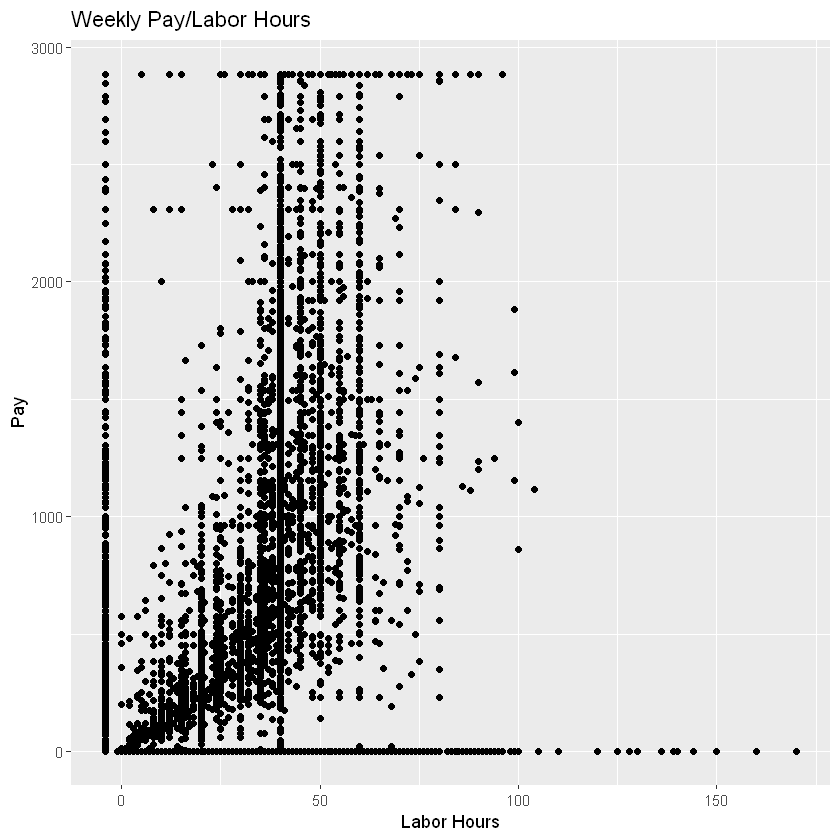

In [25]:
# PRIOR FILTER: None
# ADDED FILTER: children and military, {v != 0000}, let v = variable

# PRIORS
gross_weekly  <- person_no_children_or_armed_forces$A_GRSWK
hours_weekly  <- person_no_children_or_armed_forces$PEHRUSLT

# FUNCTION CALL
x_y_geom_point(person_no_children_or_armed_forces, hours_weekly, gross_weekly,
               "Labor Hours", "Pay", "Weekly Pay/Labor Hours")

Note the points at x = -4, x = -1, and x = 0. These are values of labor hours that are not in the universe of labor hours, or represent categorical classes, which add unneeded complexity when considering hours worked/week as a purely quantitative variable.

### Filter 2: Weekly Labor Hours, Strictly Positive

**Levels Removed**
- x = -4
    - Reasoning: Represents "hours vary", a factor that does not allow us to consider how much hours vary by. Given that I am interested in considering labor hours as a purely quantitative variable, this level of the variable must be removed.
- x = -1
    - Reasoning: represents adult civilians who are not in the labor hours universe, therefore they must be excluded.
- x = 0
    - Reasoning: represents 0 hours worked; to calculate pay rate, one would have to divide by 0. 0 hours worked represents a confusing outlier that does not necessarily add meaning to the interpretation of our data, and therefore the choice was made to remove it.

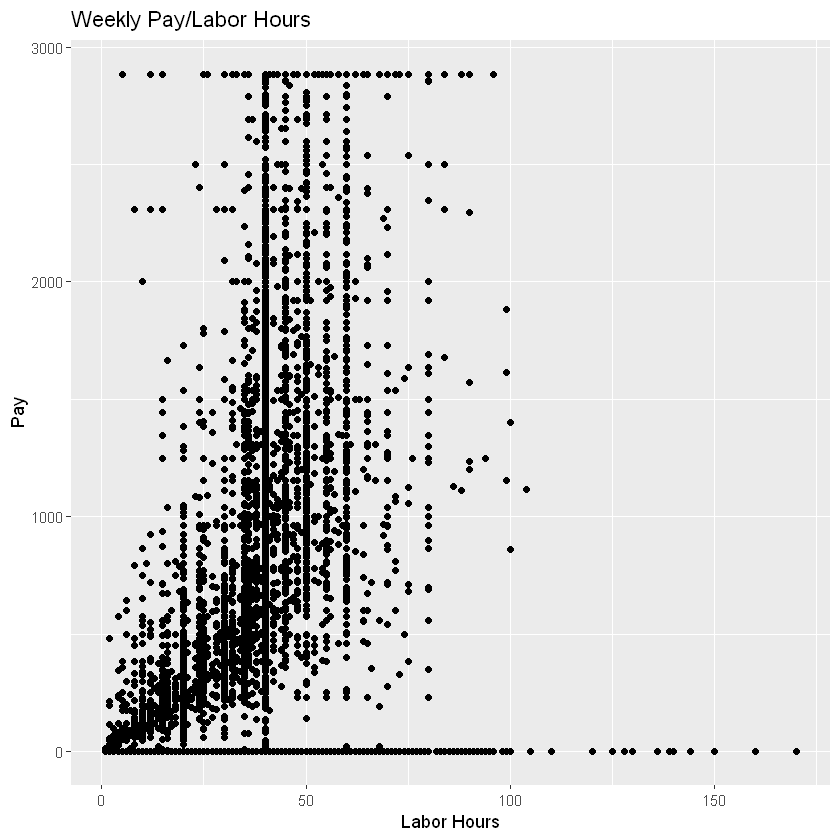

In [26]:
# PRIOR FILTERS: NO children and armed forces, ONLY primary income eligibility 
# ADDED FILTER: labor hours {v != -4, -1, 000}

# PRIORS
gross_weekly  <- person_labor_hours$A_GRSWK
hours_weekly  <- person_labor_hours$PEHRUSLT

# FUNCTION CALL
x_y_geom_point(person_labor_hours, hours_weekly, gross_weekly,
               "Labor Hours", "Pay", "Weekly Pay/Labor Hours")

The remaining issue with the data appears to be that many people are receiving 0 pay. This is nonsensical on its face, as if we are interested in considering people in the labor force, we must make the inherent assumption that they are at least making *some* amount of money. Furthermore, how could one put in 75 labor hours and receive no pay? The absurdity of the previous statement demonstrates the need to filter out people whose pay is equal to zero.

In [27]:
dim(person_labor_hours)
min(person_labor_hours$A_GRSWK)
min(person_labor_hours$PEHRUSLT) # minimum labor hours for dataset = 10

[1] 66731   832

[1] 0

[1] 1

### Filter 3: Weekly Income, Strictly Positive

The more sensical reason to remove those whose pay is equal to 0 is that these people likely represent those who are unemployed, or for whatever other reason are not included in the "Gross Weekly Pay" universe.

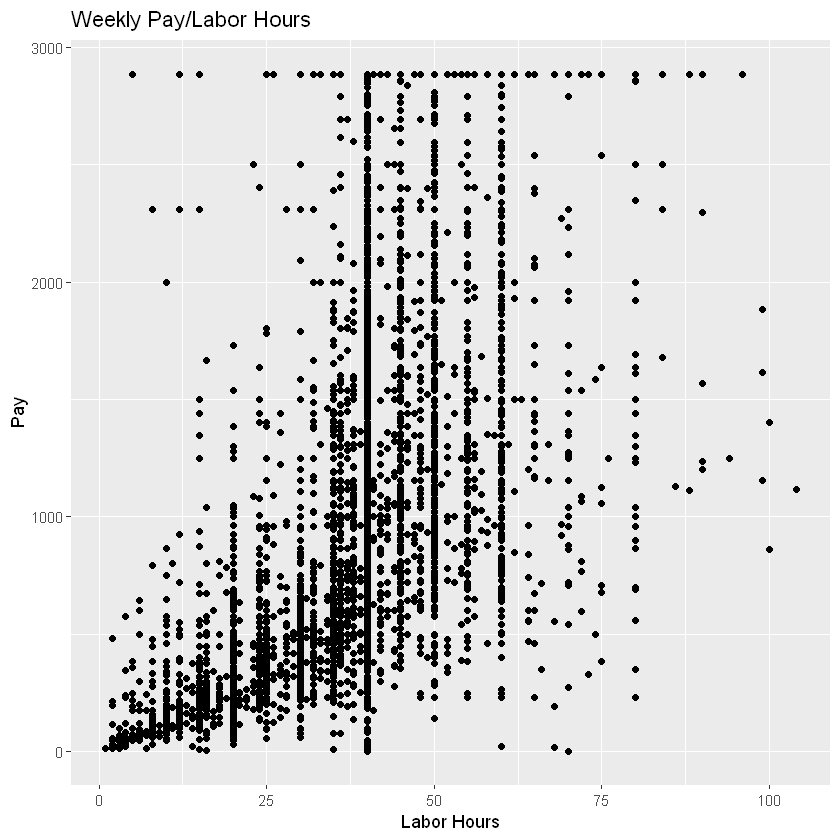

In [28]:
# PRIOR FILTERS: NO children and armed forces, ONLY primary income eligibility, NEITHER varied work hours nor NIU adult civilians 
# ADDED FILTER: ONLY income > 0

pp_income_over_0  <- person_labor_hours %>% # pp = person dataset, income_over_0 = the last filter applied
    filter(A_GRSWK > 0)

# PRIORS
gross_weekly  <- pp_income_over_0$A_GRSWK
hours_weekly  <- pp_income_over_0$PEHRUSLT

# FUNCTION CALL
x_y_geom_point(pp_income_over_0, hours_weekly, gross_weekly,
               "Labor Hours", "Pay", "Weekly Pay/Labor Hours")

In [29]:
dim(person_labor_hours)
dim(pp_income_over_0)
min(gross_weekly)

[1] 66731   832

[1] 10168   832

[1] 1

In [30]:
# WRITE REDEFINED DATA FRAME TO .csv
write.csv(pp_income_over_0, "C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/income_over_0_pppub22.csv", row.names=FALSE)

In [31]:
break

ERROR: Error in eval(expr, envir, enclos): no loop for break/next, jumping to top level


In [32]:
# Retreive original household data
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/March 2022 CPS Data")
household  <- read.csv("hhpub22.csv")

In [33]:
#CHANGE WORKING DIRECTORY to user-modified data directory
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data") # Redefine working directory

In [34]:
# LOAD USER-DEFINED PERSON DATA
person  <- read.csv("income_over_0_pppub22.csv")

# Secondary Filters & Recodes

#### Why haven't you renamed the variables yet?

Excellent question. I haven't renamed the variables because, at the filtering stage, it's very useful to look up the variable levels, as well as the variables themselves, in the corresponding data dictionary:

https://www2.census.gov/programs-surveys/cps/datasets/2022/march/asec2022_ddl_pub_full.pdf

It can be easy to forget the CPS ASEC variable names, because they're not particularly intuitive. So I prefer to keep them in their "original form." Worry not - the variables will all be given more intuitive names once they are filtered if necessary. 

In [35]:
pp.job_qual <- person %>% 
    select(H_SEQ = PH_SEQ, PPPOS, A_CIVLF, PEMLR, A_EXPLF, A_PAYABS, PRDISC, 
           PEHRUSLT, PRDTRACE, A_FTLF, A_UNCOV, A_UNMEM, A_GRSWK, A_HGA, A_SEX, A_HRLYWK)

hh  <- household %>% #establishing household variables
    select(H_SEQ, HTOTVAL, H_NUMPER)

names(pp.job_qual)
names(hh)

[1] "H_SEQ"    "PPPOS"    "A_CIVLF"  "PEMLR"    "A_EXPLF"  "A_PAYABS"
 [7] "PRDISC"   "PEHRUSLT" "PRDTRACE" "A_FTLF"   "A_UNCOV"  "A_UNMEM" 
[13] "A_GRSWK"  "A_HGA"    "A_SEX"    "A_HRLYWK"

[1] "H_SEQ"    "HTOTVAL"  "H_NUMPER"

In [36]:
# FUNCTIONALIZED CORRELATION TABLE

# PREREQUISITES:
#cor.jobqual <- cor(pp.job_qual) #take data.frame, return cor (correlation matrix)
melt.cor.jobqual <- melt(cor(pp.job_qual)) # take cor, return melted cor

# FUNCTION:
#Functionalizing correlation table to save time and space later
quick_correlation_table  <- function(melted_df, title) {

    gg <- ggplot(data = melted_df, aes(x = Var1, y = Var2, fill = value)) +
      geom_tile(color = "white") +
      geom_text( size = 4, color = "black", aes(label = round(value, digits = 2))) +
      scale_fill_gradient2(low = "blue", high = "red", limit = c(-1,1)) +
      ggtitle(title) +
      theme_minimal()

    gg <- gg + theme(
      plot.title = element_text(color="black", size=14)
        )
    
    return(gg)
    }
# FUNCTION CALL
#quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

Warning message in cor(pp.job_qual):
"the standard deviation is zero"


## Applying full time/part-time labor force split
In a section that follows, I demonstrate that there is a systematic difference between the pay rates of part-time and full-time workers.

Therefore, I considered that it would be useful to split full and part-time workers into two separate variables, despite the fact that their original variable can account for both.

In [37]:
print("dim pre")
print(dim(pp.job_qual))

pp.job_qual  <- pp.job_qual %>% 
    mutate(full_time = A_FTLF,
          part_time = A_FTLF)

pp.job_qual  <- pp.job_qual %>% 
    mutate(part_time = replace(part_time, part_time == 0, 666), #666 = placeholder value
           part_time = replace(part_time, part_time == 1, 0), #replace 1 with 0
          part_time = replace(part_time, part_time == 666, 1)) # replace placeholder value

print("dim post")
print(dim(pp.job_qual))
print(paste("|"))
print("full-time: first 10 values")
print(head(pp.job_qual$full_time, 10))
print("part-time: first 10 values") 
print(head(pp.job_qual$part_time, 10))


[1] "dim pre"
[1] 10168    16
[1] "dim post"
[1] 10168    18
[1] "|"
[1] "full-time: first 10 values"
 [1] 1 1 1 1 0 1 1 1 1 1
[1] "part-time: first 10 values"
 [1] 0 0 0 0 1 0 0 0 0 0


### The correlation heat map

Heat maps are a very useful way of guaging the strength and direction of relationships between variables. Blue cells represent negative correlations, red cells represent positive correlations. The greater the opacity of a cell, the smaller the correlation.

Now, heat maps may be used for quantitatively qualifying categorical variables. However, as a rule of thumb, a categorical variable cannot be put in a correlation table with a quantitative variable, because often the resulting correlation is a number that does not represent anything.

Most of the variables in the dataset are in fact categorical - so why keep using correlation heat maps? The answer, simply put, is that they are somewhat indicative. For instance, any NA correlations between one variable and all others represent singularities. The heat map helps us spot these variables very intuitively, and makes targeting them for removal easily.

Warning message in cor(pp.job_qual):
"the standard deviation is zero"
Warning message:
"Removed 96 rows containing missing values (`geom_text()`)."


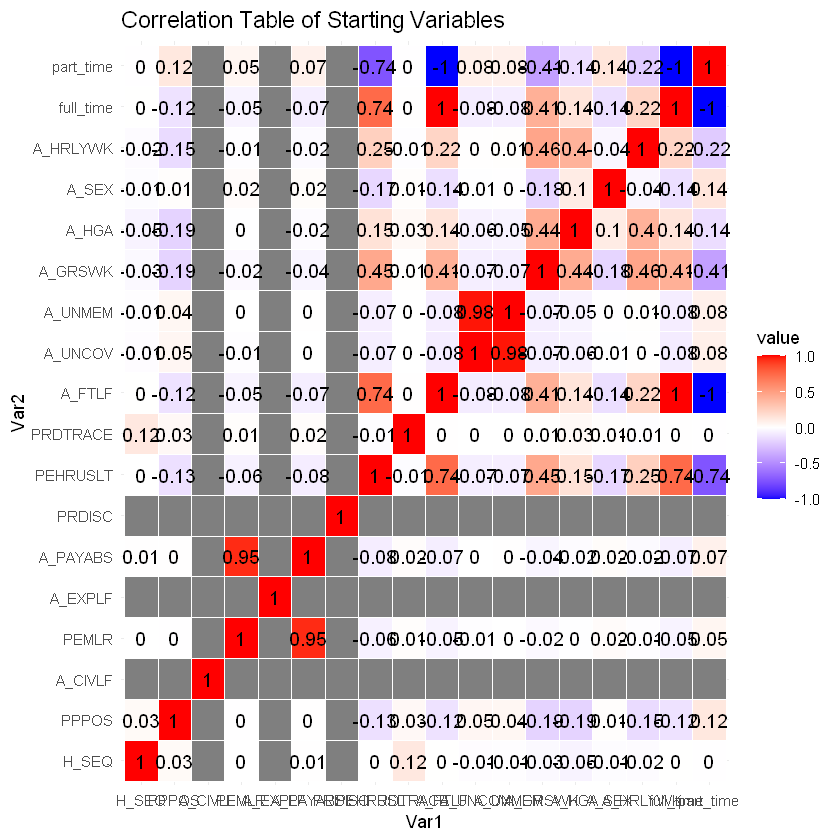

In [38]:
cor_obj  <- cor(pp.job_qual)

melt.cor.jobqual <- melt(cor_obj)
quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

The variables that classify discouraged workers, experienced workers, and those in the civilian labor force can be removed from our data, as they are either perfectly correlated (singularities) or perfectly uncorrelated (in the case of discouraged workers) with our dataset.

In [39]:
# FILTER: REMOVE COLUMNS WITH NA CORRELATIONS IN DATASET/GRAY ROWS IN HEATMAP

names(pp.job_qual )

pp.job_qual  <- pp.job_qual %>%
    select(-c("PRDISC", "A_EXPLF", "A_CIVLF"))

names(pp.job_qual)

[1] "H_SEQ"     "PPPOS"     "A_CIVLF"   "PEMLR"     "A_EXPLF"   "A_PAYABS" 
 [7] "PRDISC"    "PEHRUSLT"  "PRDTRACE"  "A_FTLF"    "A_UNCOV"   "A_UNMEM"  
[13] "A_GRSWK"   "A_HGA"     "A_SEX"     "A_HRLYWK"  "full_time" "part_time"

[1] "H_SEQ"     "PPPOS"     "PEMLR"     "A_PAYABS"  "PEHRUSLT"  "PRDTRACE" 
 [7] "A_FTLF"    "A_UNCOV"   "A_UNMEM"   "A_GRSWK"   "A_HGA"     "A_SEX"    
[13] "A_HRLYWK"  "full_time" "part_time"

## Union members recode

### Initial Code
`A_UNMEM`: 0:NIU, 1:Yes, 2:No.
### Recode
`A_UNMEM`: 0:No, 1:Yes
### Reasoning
 The union membership variable in the above correlation table is negatively correlated with income. That makes no sense, as we know that "Workers with union representation enjoy a significant pay premium compared to non-union workers." (United States Department of Labor). The answer lies in the codes. If yes is coded to a lesser value than no, then the correlation appears to be negative. However, when those codes are flipped, the reverse is true. Both are equally representative of reality. Crucially, the latter method allows us to leverage human heuristics instead of forcing human readers to pause and consider the coding.

In [40]:
# FILTER: UNION MEMBERS VS. NON-UNION MEMBERS
union_df_b   <- pp.job_qual  %>% 
    filter(A_UNMEM != 0) #remove NIU (children, armed forces, just in case)

dim(union_df_b) # the dim does not change once the NIU value is removed, so we do not lose any of our data
                # by applying this filter.

union_df   <- pp.job_qual  %>% 
    select(A_GRSWK, A_UNMEM) %>%
    filter(A_UNMEM != 0)

[1] 10168    15

,A_GRSWK,A_UNMEM
,<int>,<dbl>
1,923,1
2,1538,0
3,2885,0
4,1000,0
5,330,0
6,606,1


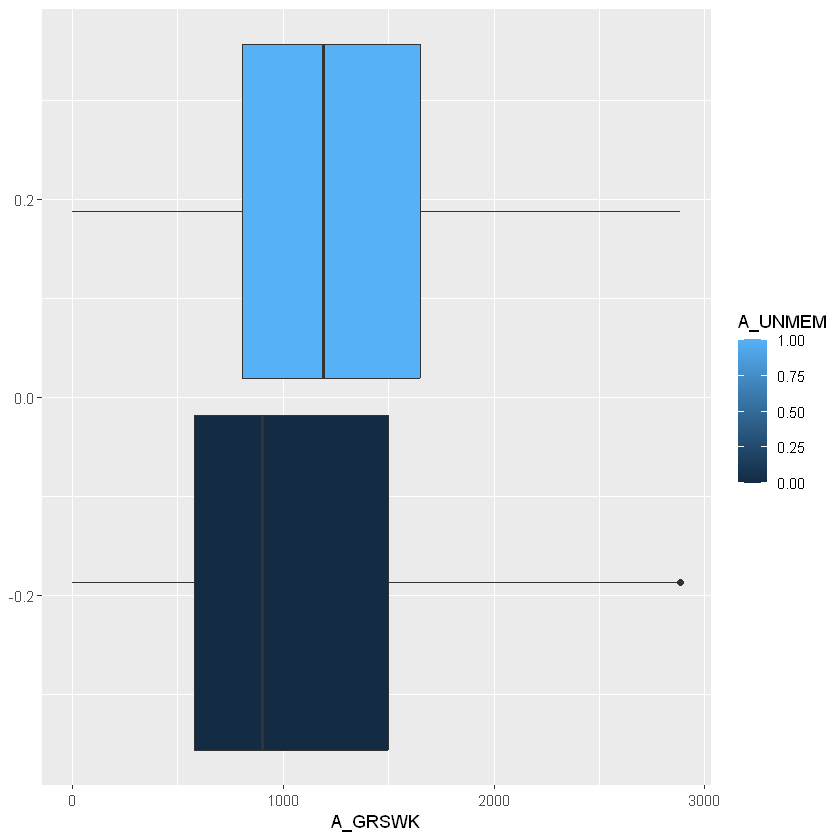

In [41]:
# Recode take 1
union_df  <- union_df  %>% 
    mutate(A_UNMEM = replace(A_UNMEM, A_UNMEM == 2, 0)) #flip position of "No" relative to "Yes." Relationship otherwise held constant.

head(union_df)

# Recode boxplot
gg  <- ggplot(data = union_df, aes(group = A_UNMEM, A_GRSWK))
gg + geom_boxplot(aes(fill = A_UNMEM))

This boxplot, which uses the new coding for union members, matches what we would expect to see, given the literature on the salary benefits of unions: the median pay, as well as the 1st-3rd interquartile range for union members (Light blue, `A_UNMEM = 1`), is relatively higher than that of non-union members (Dark blue, `A_UNMEM = 0`).

In [42]:
cor_income_union  <- cor(union_df) # Confirmatory correlation output
cor_income_union[1,2] # Extract correlation between union membership and gross weekly income

[1] 0.07225735

This correlation shows us that the relationship between `A_UNMEM` and `A_GRSWK` has been equivalently flipped (same correlation but positive).

## Union Coverage vs. Union Membership
`A_UNCOV` and `A_UNMEM` are similar, but with one important qualitative difference. Union membership implies coverage, while non-union membership does not, so coverage is accounted for separately via the union coverage, `A_UNCOV` variable. 

### Union Membership
#### Levels

* 1 - Yes (Implies Union Coverage = Yes)
* 0 - No

### Union Coverage
#### Levels

* 0 - NIU (Implies Union Membership)
* 1 - Yes (Union Coverage)
* 2 - No (Implies no union membership and/or coverage)

## Absentee Pay Recode

### Initial Code
`A_PAYABS`: 0:NIU, 1:Yes, 2:No, 3:Self-employed.
### Recode
`A_PAYABS`: 0:NIU, 1:No, 2:Yes
### Reasoning
Heuristic-friendly. Excluding 0:NIU excludes everyone who is not currently absent from work. We don't want to do that because we not interested in solely analyzing this category.

The primary focus of this data analysis is to determine relationships between different classes of wage-earners, and self-employed people are not wage-earners. They have a different implicit relationship to their means of production. Where an employee at any given company is more likely to use company resources as their means of production, self-employed people typically acquire their own tools, software, etc., which means they may be more likely to have their own means of production. By that metric, their means of production are likely to be systematically different, in that self-employed people are more likely to own the means of their own production vs. the employed. This likely significant difference provides additional grounds for their exclusion, beyond their pay not being defined by the traditional wage.

In [43]:
dim(pp.job_qual) # dim check pre
head(pp.job_qual$A_PAYABS)
pp.job_qual  <- pp.job_qual %>% 
    filter(A_PAYABS != 3) # this filter is redundant, dims do not change after filter applied.

dim(pp.job_qual) #dim check post

head(pp.job_qual)

[1] 10168    15

[1] 1 0 0 0 0 0

[1] 10168    15

,H_SEQ,PPPOS,PEMLR,A_PAYABS,PEHRUSLT,PRDTRACE,A_FTLF,A_UNCOV,A_UNMEM,A_GRSWK,A_HGA,A_SEX,A_HRLYWK,full_time,part_time
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,5,42,2,1,40,1,1,0,1,923,43,2,1,1,0
2,9,41,1,0,55,1,1,2,2,1538,44,2,1,1,0
3,9,42,1,0,50,1,1,2,2,2885,42,1,2,1,0
4,77,41,1,0,50,1,1,2,2,1000,45,2,2,1,0
5,77,42,1,0,20,1,0,2,2,330,40,1,1,0,1
6,97,41,1,0,50,1,1,0,1,606,43,2,1,1,0


It appears that we have already excluded self-employed people! (based on the fact that the dimensions of the data are identical pre and post-filter, see output above) 

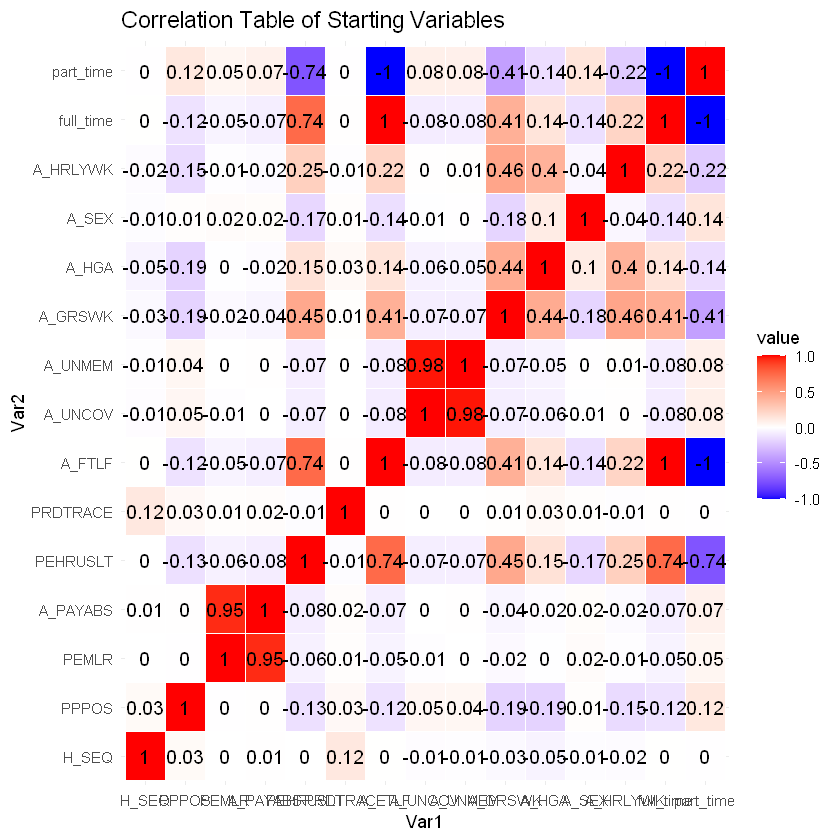

In [44]:
melt.cor.jobqual <- melt(cor(pp.job_qual)) # take cor, return melted cor
quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

In [45]:
# RENAMING VARIABLES

pp.job_qual <- pp.job_qual %>% 
        rename("income_week" = "A_GRSWK",
               "union_member" = "A_UNMEM",
               "union_coverage" = "A_UNCOV",
               "full_time_flag" = "A_FTLF",
              "hours_week" = "PEHRUSLT",
              "paid_abscence" = "A_PAYABS",
              "labor_code" = "PEMLR",
              "gender_binary" = "A_SEX",
              "education_level" = "A_HGA",
              "race" = "PRDTRACE",
              "paid_hourly" = "A_HRLYWK")


## Coding Categorical Variables as Factors

An important step for our dataset is telling R which variables are categorical and which are quantitative. The following code cell applies the "factor" classification to any variables in the data set with fewer than 30 unique values.

In [47]:
# a brief survey.
summary_pre_factor  <- summary(pp.job_qual)
summary_pre_factor

     H_SEQ           PPPOS        labor_code    paid_abscence    
 Min.   :    5   Min.   :41.0   Min.   :1.000   Min.   :0.00000  
 1st Qu.:22695   1st Qu.:41.0   1st Qu.:1.000   1st Qu.:0.00000  
 Median :44297   Median :41.0   Median :1.000   Median :0.00000  
 Mean   :44992   Mean   :41.7   Mean   :1.022   Mean   :0.03314  
 3rd Qu.:68291   3rd Qu.:42.0   3rd Qu.:1.000   3rd Qu.:0.00000  
 Max.   :88866   Max.   :54.0   Max.   :2.000   Max.   :2.00000  
   hours_week          race        full_time_flag   union_coverage 
 Min.   :  1.00   Min.   : 1.000   Min.   :0.0000   Min.   :0.000  
 1st Qu.: 40.00   1st Qu.: 1.000   1st Qu.:1.0000   1st Qu.:2.000  
 Median : 40.00   Median : 1.000   Median :1.0000   Median :2.000  
 Mean   : 39.25   Mean   : 1.457   Mean   :0.8442   Mean   :1.791  
 3rd Qu.: 40.00   3rd Qu.: 1.000   3rd Qu.:1.0000   3rd Qu.:2.000  
 Max.   :104.00   Max.   :26.000   Max.   :1.0000   Max.   :2.000  
  union_member    income_week   education_level gender_binary 

The code cell below classifies every variable that has fewer than 30 unique observations as a factor.

In [48]:
# CODING FACTORS
dim(pp.job_qual)
pp.job_qual_2 <- pp.job_qual

col_names <- sapply(pp.job_qual_2, function(col) length(unique(col)) < 30)
pp.job_qual_2[ , col_names] <- lapply(pp.job_qual_2[ , col_names] , factor)
                    
summary(pp.job_qual_2)
dim(pp.job_qual_2)      

[1] 10168    15

     H_SEQ           PPPOS      labor_code paid_abscence   hours_week    
 Min.   :    5   41     :5240   1:9943     0:9943        Min.   :  1.00  
 1st Qu.:22695   42     :3530   2: 225     1: 113        1st Qu.: 40.00  
 Median :44297   43     : 906              2: 112        Median : 40.00  
 Mean   :44992   44     : 313                            Mean   : 39.25  
 3rd Qu.:68291   45     : 107                            3rd Qu.: 40.00  
 Max.   :88866   46     :  42                            Max.   :104.00  
                 (Other):  30                                            
      race      full_time_flag union_coverage union_member  income_week  
 1      :8133   0:1584         0: 998         1: 998       Min.   :   1  
 2      :1059   1:8584         1: 126         2:9170       1st Qu.: 600  
 4      : 625                  2:9044                      Median : 933  
 3      : 132                                              Mean   :1135  
 5      :  57                         

[1] 10168    15

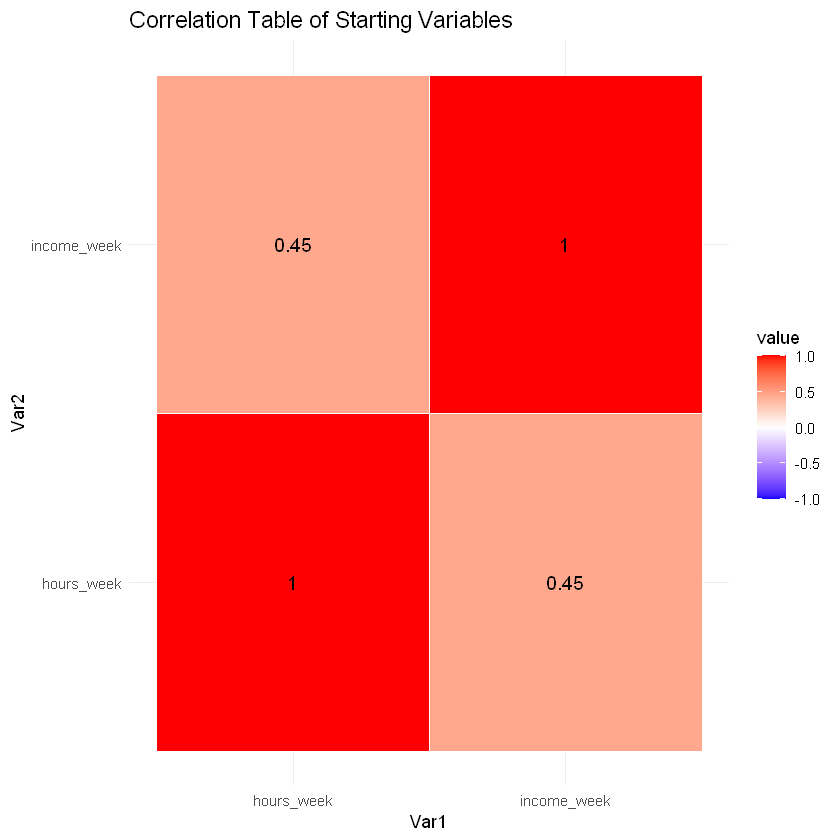

In [49]:
pp.for.cor  <- pp.job_qual_2 %>%
    select(hours_week, income_week)

melt.cor.jobqual <- melt(cor(pp.for.cor)) # take cor, return melted cor
quick_correlation_table(melt.cor.jobqual, "Correlation Table of Starting Variables")

After removing the factors, we only have the correlation between income per week and hours worked per week (.45).

## Additional Data Cleaning, adding new variables

### Removing the full-time flag
The `full_time_flag` variable is identical to `full_time`. It's an appendix; removing it from our data makes for a tidier table.

In [50]:
pp.job_qual_3  <- pp.job_qual_2 %>% #Can only be run once, unless you reload the prior data.
    select(-c(full_time_flag))

## Adding Pay Rate
Adding pay rate is simple. You can tell R to "mutate" a new variable using 2 pre-existing ones. In the below code cell, I tell R to divide `income_week` by `hours_week`. 

By doing this, I am telling R to perform vectorized operations. R takes every coordinate set $(x_{n}{\text{income_week}}, x_{n}{\text{hours_week}})$, which represents the corresponding `income_week` and `hours_week`values for any given person, and divides $x_{n}{\text{income_week}}$ by $x_{n}{\text{hours_week}}$ for every person in the dataset, resulting in a new variable, $x_{n}{\text{pay_rate}}$ for every person.

In [51]:
pp.job_qual_3  <- pp.job_qual_3 %>%
    mutate(pay_rate = income_week/hours_week)

names(pp.job_qual_3)

[1] "H_SEQ"           "PPPOS"           "labor_code"      "paid_abscence"  
 [5] "hours_week"      "race"            "union_coverage"  "union_member"   
 [9] "income_week"     "education_level" "gender_binary"   "paid_hourly"    
[13] "full_time"       "part_time"       "pay_rate"

# Establishing Train and Test Sets

In [52]:
# Create your validation sets
train.inds=sample(1:nrow(pp.job_qual_2), 1000) #10/90 split into training and test sets
test= -(train.inds) #get test indices (not training indices)

train  <- pp.job_qual_2[train.inds,]
dim(train)

test  <- pp.job_qual_2[test,]
dim(test )

[1] 1000   15

[1] 9168   15

**Data Distribution Visualisation**

Gross Weekly Income

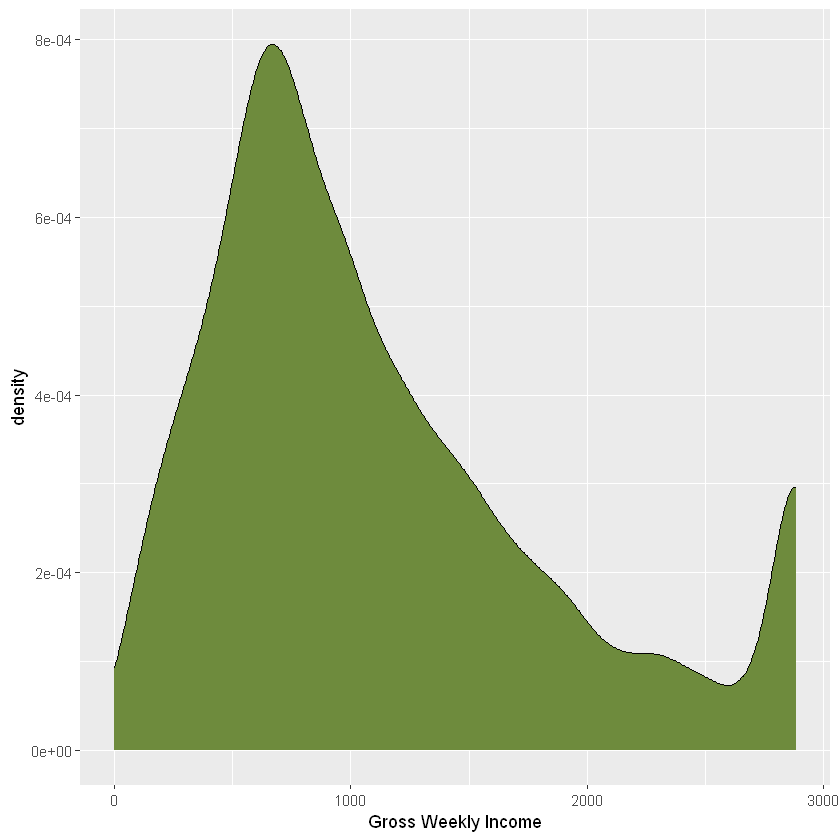

In [53]:
gg.distribution  <- ggplot (data = person, aes(A_GRSWK)) + labs(x = "Gross Weekly Income") 
gg.distribution + geom_density(fill = "darkolivegreen4")

**Data Distribution Visualisation**

Hours worked weekly

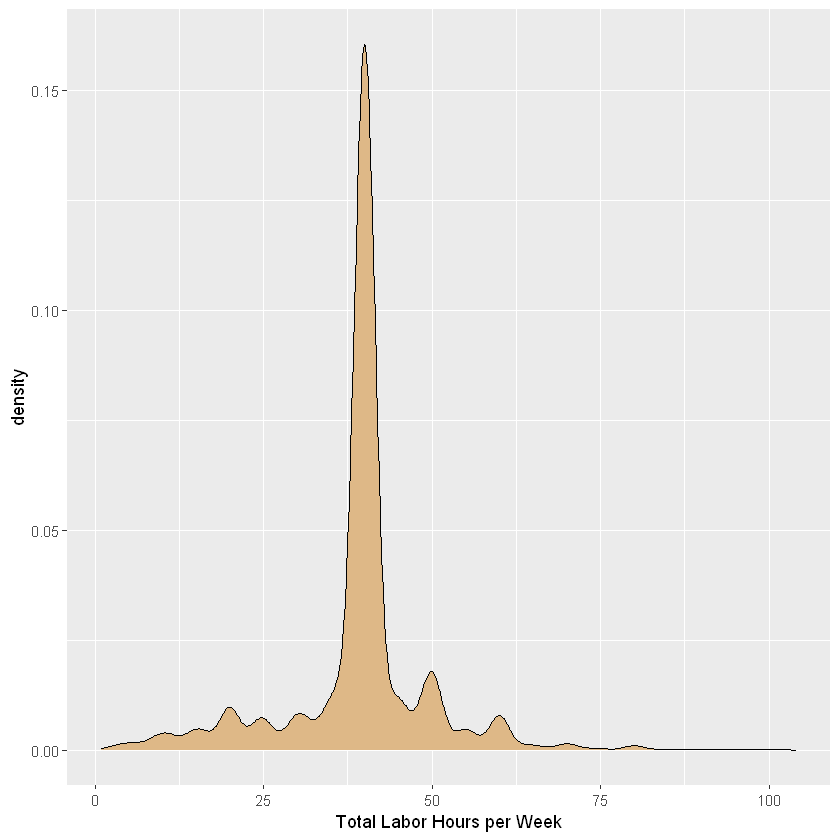

In [54]:
gg.distribution  <- ggplot (data = person, aes(PEHRUSLT)) + labs(x = "Total Labor Hours per Week") 
gg.distribution + geom_density(fill = "burlywood")

Hours appear to have a Gaussian distribution centered around x = 40, where x = total labor hours per week.

# Full-Time vs. Part-Time Workers: Labor Hours, Pay

In [59]:
glm_test  <- glm(income_week ~ full_time, family = Gamma("identity"), data = pp.job_qual_2)
summary(glm_test)

glm_test  <- glm(income_week ~ full_time + hours_week, family = Gamma("identity"), data = pp.job_qual_2)
summary(glm_test)

glm_test  <- glm(income_week ~ full_time:hours_week, family = Gamma("identity"), data = pp.job_qual_2)
summary(glm_test)


Call:
glm(formula = income_week ~ full_time, family = Gamma("identity"), 
    data = pp.job_qual_2)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    421.6        6.8   62.00   <2e-16 ***
full_time1     845.4       11.1   76.14   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4120414)

    Null deviance: 5052.7  on 10167  degrees of freedom
Residual deviance: 3798.8  on 10166  degrees of freedom
AIC: 157486

Number of Fisher Scoring iterations: 3



Call:
glm(formula = income_week ~ full_time + hours_week, family = Gamma("identity"), 
    data = pp.job_qual_2)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.781      8.801   5.543 3.05e-08 ***
full_time1   431.456     19.489  22.139  < 2e-16 ***
hours_week    18.230      0.569  32.039  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4299081)

    Null deviance: 5052.7  on 10167  degrees of freedom
Residual deviance: 3446.4  on 10165  degrees of freedom
AIC: 156440

Number of Fisher Scoring iterations: 6


Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message:
"step size truncated due to divergence"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"
Warning message in log(ifelse(y == 0, 1, y/mu)):
"NaNs produced"



Call:
glm(formula = income_week ~ full_time:hours_week, family = Gamma("identity"), 
    data = pp.job_qual_2)

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            65.7668     9.7192   6.767 1.39e-11 ***
full_time0:hours_week  16.7611     0.6123  27.373  < 2e-16 ***
full_time1:hours_week  28.1981     0.3127  90.176  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4249118)

    Null deviance: 5052.7  on 10167  degrees of freedom
Residual deviance: 3419.0  on 10165  degrees of freedom
AIC: 156354

Number of Fisher Scoring iterations: 7


In [67]:
set.seed(666)

person_full_time  <- pp.job_qual_2 %>% 
    filter(full_time != 0) # Exclude part time labor force

person_full_time  <- person_full_time[sample(nrow(person_full_time), 1000), ]


person_part_time  <- pp.job_qual_2 %>%
    filter(full_time != 1) # Exclude full time labor force

person_part_time  <- person_part_time[sample(nrow(person_part_time), 1000), ]

#Use statesticle tests to compare them

In [68]:
# Check dims
person_full_time %>%
dim()

person_part_time %>%
dim()

[1] 1000   15

[1] 1000   15

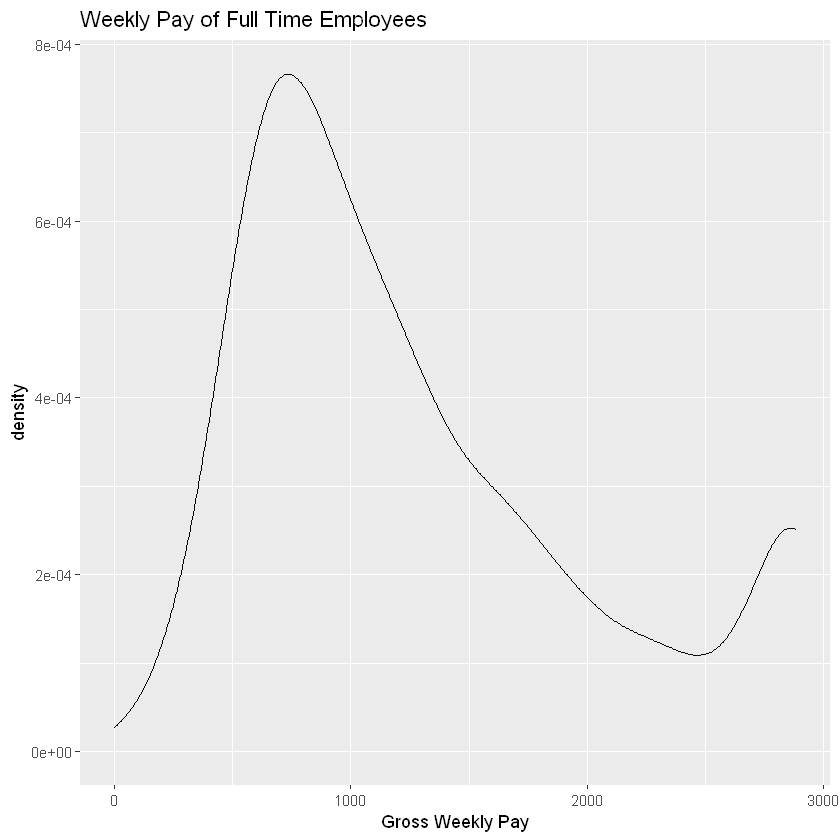

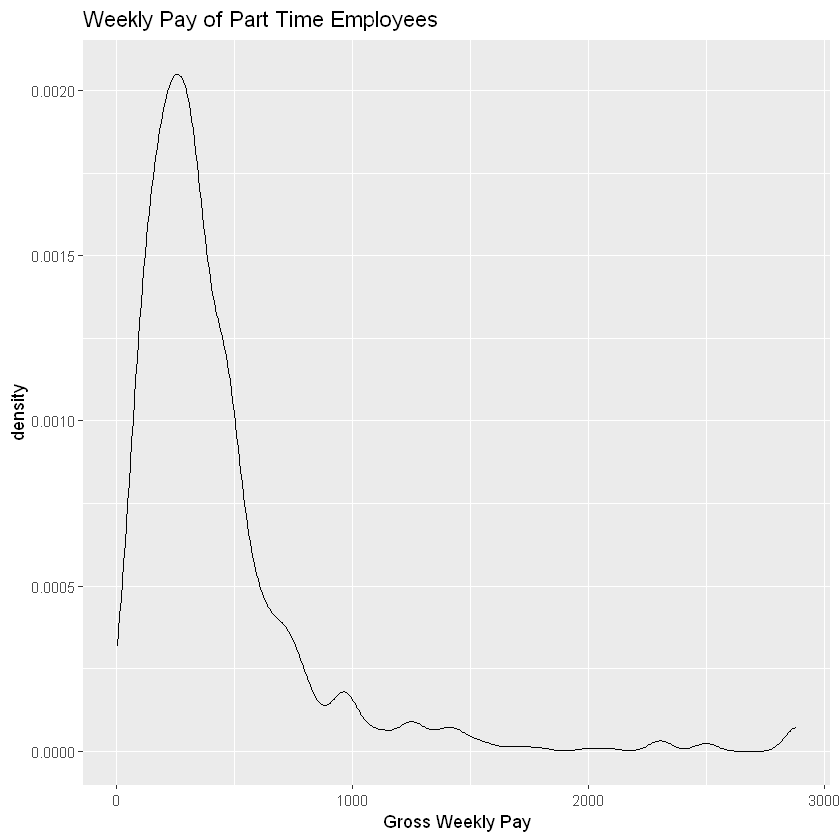

In [69]:
#Plotting train sets

gg_ft  <- ggplot(data = person_full_time, aes(income_week)) +
    geom_density() +
    labs(x = "Gross Weekly Pay", title = "Weekly Pay of Full Time Employees")

gg_ft


gg_pt  <- ggplot(data = person_part_time, aes(income_week)) +
    geom_density() +
    labs(x = "Gross Weekly Pay", title = "Weekly Pay of Part Time Employees")

gg_pt

In [71]:
full_time_gross_income = person_full_time$income_week
part_time_gross_income = person_part_time$income_week

#wilcox.test(full_time_gross_income, part_time_gross_income, alternative = "two.sided")
wilcox.test(full_time_gross_income, part_time_gross_income, alternative = "greater") #x, full time gross income, is > y, part time gross income


	Wilcoxon rank sum test with continuity correction

data:  full_time_gross_income and part_time_gross_income
W = 904227, p-value < 2.2e-16
alternative hypothesis: true location shift is greater than 0


## Data visualisation conclusions

### Full-time vs. part-time workers

Full-time workers appear to differ systematically from part-time workers. Upon this basis, I cocnclude that they should either:

1. Be analyzed separately
2. Models that control for their intercorrelation must be built

# Introducing the economic class measure

Household income can be used as a measure of economic class. The economic classes are defined as lower, middle, and upper. The lower class makes under 2/3 of the median income, the middle class makes from 2/3 to 2 times the median income, and the upper class makes 2 times the median income. 

This method of classification was taken from Pew Research Center analysis of the 2021 Current Population Survey, Annual Social and Economic Supplement (IPUMS).

Since this study is concerned with predictors of job outcome, the classification of economic class is included in order to determine the degree of impact of economic class on job outcomes.

In order to consider household income, the datasets for individuals and households must be merged, so that we can assess the impact of household income, representative of class, on individuals. By doing this, we are able to make relatively more holistic judgements.

It is relevant to note that household income is a measure of the prior year. Ideally, we would want to trace housheold income back across sevral years in order to have a more accurate predictive and explanatory capability. Such an analysis is beyond the scope of this study, and is already present in the literature. The literature notes that US household income distribution has not changed significantly over the years. (Pew Research Center, 2022)

In [ ]:
summary(hh)
hh   <- rename(hh, hh_income = HTOTVAL)
hh   <- rename(hh, hh_persons = H_NUMPER)

## Adjusted Income

Household income does not account for income per people the income supports. To correct for this, adjusted income can be calculated as the total household income divided by the number of persons in the household times 1/2, following other researchers. (Pew Research Center, 2022)

$$\text{adjusted household income} = \text{household income}/\text{number of household members}^{0.5}$$

In [ ]:
# adjusted income
n = .5

hh  <- hh %>% mutate(income_adj  = hh_income/((hh_persons)^.5))

hh  <- hh %>% drop_na()

head(hh, 10)

Economic class, `income_class` can then be calculated as a function of adjusted income, producing a more accurate estimate of class in terms of income per people supported.

In [ ]:
lower_bound <- 2/3 * median(hh$income_adj)
upper_bound  <- 2 * median(hh$income_adj)
#lc

hh$income_class <- as.factor(ifelse(hh$income_adj < lower_bound, 'lower',
                          ifelse(hh$income_adj > upper_bound, "upper", "middle")))

#hh_econ_class  <- hh %>%
    

Note the values of the lower and upper bounds.

In [ ]:
lower_bound
upper_bound

In [ ]:
head(hh, 10)

## Merging household and person measures

The measures of economic class come from the household data table, which is separate from the measures of individual-related variables from the person data table. To use the household data and the person data together, they have to be merged.

In [ ]:
hhpp.dat <- inner_join(pp.job_qual_3, hh, by = c("H_SEQ"))

summary(hhpp.dat)
dim(hhpp.dat)

In [ ]:
hhpp.dat$education_level <- recode_factor(hhpp.dat$education_level, "31" = "sub_gs",
                                                "32" = "1.4",  "33" = "5.6", "34" = "7.8", 
                                                "35" = "9", "36" = "10", "37" = "11", "38" = "12",
                                               "39" = "hs", "40" = "c_some", "41" = "c_a_occ.voc", "42" = "c_a_acad",
                                               "43" = "c_b", "44" = "c_m", "45" = "prof", "46" = "c_d")

levels(hhpp.dat$education_level)

In [ ]:
# Write the data to a file so it can't be corrupted (or rather, is harder to corrupt)

# WRITE REDEFINED DATA FRAME TO .csv
write.csv(hhpp.dat, "C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/data_clean_2.csv", row.names=FALSE)

In [ ]:
hhpp.dat  <- read.csv("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/data_clean_2.csv")

In [ ]:
hhpp.dat$education_level <- recode_factor(hhpp.dat$education_level, "sub_gs" = "sub_gs",
                                                "1.4" = "1.4",  "5.6" = "5.6", "7.8" = "7.8", 
                                                "9" = "9", "10" = "10", "11" = "11", "12" = "12",
                                               "hs" = "hs", "c_some" = "c_some", "c_a_occ.voc" = "c_a_occ.voc", "c_a_acad" = "c_a_acad",
                                               "c_b" = "c_b", "c_m" = "c_m", "prof" = "prof", "c_d" = "c_d")

summary(hhpp.dat$education_level)

In [ ]:
# DEFINE CATEGORIGAL VARIABLES AS FACTORS

col_names <- sapply(hhpp.dat, function(col) length(unique(col)) < 30)
hhpp.dat[ , col_names] <- lapply(hhpp.dat[ , col_names] , factor)
                    
head(hhpp.dat, 0)   

# Merged data visualisations
## Heat map: Quantitative variable intercorrelations

In [ ]:
hhpp.dat_quant  <- hhpp.dat %>%
    select(hours_week, income_week, pay_rate, income_adj)

In [ ]:
melt.cor.jobqual <- melt(cor(hhpp.dat_quant)) # take cor, return melted cor
quick_correlation_table(melt.cor.jobqual, "Quantitative variable intercorrelations")

This heat map takes all the quantitative variables in our dataset (adjusted income, pay rate, weekly income, and weekly hours) and shows their correlations. Adjusted income appears to be weakly correlated with weekly hours (0.12), and is moderately correlated with weekly income and pay rate (0.38, 0.34). Pay rate is weakly correlated with weekly hours (0.11) and strongly correlated with weekly income (0.86). As before, weekly income and weekly hours have a larger moderate correlation (0.45).

## Raw household income vs. adjusted household income

Adjusting household income has the added side benefit of somewhat normalizing our data by reducing the distribution of income.

Where raw household income has a mean of 138,301 USD and a standard deviation of 134,035, adjusted total household income has a mean of 83,062 USD and a standard deviation of 79,619 USD. Evidently, there is huge variance in the data, likely caused by upper-income outliers skewing the mean upward, as well as by the overrepresentation of middle-income people and upper-income people relative to lower-income people, when in reality lower-income people are the ones overrepresented in the general population.

The average household income across the United States in 2023 is estimated to be $\$87,864$ by the World Population Review, which is relatively close (though substantially larger) than the mean of household adjusted income in the present data.

The United States Census bureau's estimate for median household income in 2021 is $\$70,784$, a good deal higher than the median of household adjusted income in our own data, which is $\$63,538$.

The present dataset's estimates may be lower due to some exclusion of very high-income individuals from the dataset. Note that the present data excludes members of the armed forces, self-employed workers, etc.

In [ ]:
gg  <- ggplot(hhpp.dat, aes(hh_income))
gg + geom_density() + labs(title = "Raw household income density")

gg_adj  <- ggplot(hhpp.dat, aes(income_adj))
gg_adj + geom_density() + labs(title = "Adjusted household income density")

In [ ]:
#print("SUMMARIES")
print("Household income")
summary(hhpp.dat$hh_income)
sd(hhpp.dat$hh_income)
print("Adjusted household income")
summary(hhpp.dat$income_adj)
sd(hhpp.dat$income_adj)

Seeing as the levels of income likely vary systematically, it may be a good idea to split lower, middle, and upper-class people by income and analyze them separately.

In [ ]:
hhpp_lower_income  <- hhpp.dat %>%
    filter(income_class == c('lower'))

hhpp_middle_income  <- hhpp.dat %>%
    filter(income_class == c('middle'))

hhpp_upper_income  <- hhpp.dat %>%
    filter(income_class == c('upper'))

In [ ]:
summary(hhpp_lower_income$income_adj)
summary(hhpp_middle_income$income_adj)
summary(hhpp_upper_income$income_adj) 

## Density of Adjusted Income Across Economic Class

In [ ]:
gg_adj  <- ggplot(hhpp_lower_income, aes(income_adj))
gg_adj + geom_density()

gg_adj  <- ggplot(hhpp_middle_income, aes(income_adj))
gg_adj + geom_density()

gg_adj  <- ggplot(hhpp_upper_income, aes(income_adj))
gg_adj + geom_density()

In [ ]:
#let's do a facet wrap of adjusted income by income class
gg_adj  <- ggplot(hhpp.dat, aes(income_adj)) + geom_density()
gg_adj + facet_grid(cols = vars(income_class))

Where the previous charts show income in detail for every class, this chart more clearly reveals the disparity. The highest concentration of people is the lower-income people, who are at the very bottom of the income distribution. Comparatively, relatively few people seem to be enjoying a middle-class lifestyle, and the highest concentration of wealth is spread out amongst proportionally far fewer people.

In [ ]:
gg_adj_box  <- ggplot(hhpp.dat, aes(income_adj, x =income_class)) + geom_violin(scale = "area")
gg_adj_box + ylim(0, 250000) + 
labs(title = "Distribution of Adjusted Income by Economic Class", y = "Adjusted Income", x = "Economic Class")
#gg_adj + facet_grid(cols =vars(income_class))

Note that the hard cutoffs between lower, middle, and upper class are so because of the arbitrary boundary line that was previously defined to categorize people by economic class.

This violin plot shows the concentration of people according to adjusted income. The largest number of people appear to be concentrated between $\$22,000$ and $\$31,292$.

There is then a steep decrease of people immediately beyond the middle-class boundary, despite the middle class representing approximately 55% of the data. This implies that the middle class is more spread out among income, which can be seen by the two bumps where it peaks, showing its most concentrated areas are at around $\$40,000$ and $\$60,000$. There are fewer members of the middle class who make above $\$71,599$.

The upper class is most densely concentrated at around the third quartile ($\$107,962$), but the top range of the income of upper-class people extends to $\$1,339,563$, though the households that approach this figure are far fewer.

## Pay Rate's relationship to income class across variables

In [ ]:
gg_adj_box  <- ggplot(hhpp.dat, aes(income_adj, x =income_class)) + geom_boxplot() + ylim(0, 250000)
gg_adj_box + facet_grid(cols =vars(education_level)) + labs(title = "Education")
gg_adj_box + facet_grid(cols =vars(union_member)) + labs(title = "Union Membership")
gg_adj_box + facet_grid(cols =vars(gender_binary)) + labs(title = "Sex")
gg_adj_box + facet_wrap(vars(race)) + labs(title = "Race")
gg_adj_box + facet_grid(cols = vars(paid_hourly)) + labs(title = "Paid Hourly") 
#gg_adj_box

# Modeling to understand our variables

There are several variables in the dataset that influence the pay rate of individuals. I believe it is important to model these variables in order to understand their independent relationship to the outcome of interest, and then build more well-informed (and if necessary, complex) models based off this knowledge.

In [ ]:
glm_hourly  <- glm(pay_rate ~ paid_hourly, data = hhpp.dat, family = Gamma(link ="identity"))
summary(glm_hourly)
plot(allEffects(glm_hourly))

# Where 1 = paid hourly, 2 = No

It would appear that people who receive an hourly wage are paid systematically lower than those who do not, with their pay being about $\$14.39$ lower $(+/-\$0.38)$.

In [ ]:
# PAY RATE BY INCOME CLASS: normalizing data (the boxplots clearly show outliers, which will make model coefficients more difficult to interpret.)

gg_box_income  <- ggplot(hhpp.dat, aes(income_class, pay_rate)) + geom_boxplot()
# gg_box_income

summary(hhpp_lower_income$pay_rate)
summary(hhpp_middle_income$pay_rate)
summary(hhpp_upper_income$pay_rate)

#######################################################

hhpp_lower_income_payrate_normal  <- hhpp_lower_income %>%
    filter(pay_rate > 12.167)

hhpp_lower_income_payrate_normal  <- hhpp_lower_income_payrate_normal %>%
    filter(pay_rate < 20.692)

summary(hhpp_lower_income_payrate_normal$pay_rate)

#######################################################

hhpp_middle_income_payrate_normal  <- hhpp_middle_income %>%
    filter(pay_rate > 15.875)

hhpp_middle_income_payrate_normal  <- hhpp_middle_income_payrate_normal %>%
    filter(pay_rate < 31.250)

summary(hhpp_middle_income_payrate_normal$pay_rate)

#######################################################

hhpp_upper_income_payrate_normal  <- hhpp_upper_income %>%
    filter(pay_rate > 23.089)

hhpp_upper_income_payrate_normal  <- hhpp_upper_income_payrate_normal %>%
    filter(pay_rate < 53.3937)

summary(hhpp_upper_income_payrate_normal$pay_rate)

In [ ]:
# joining income pay rate normal data frames
dim(hhpp_lower_income_payrate_normal)

dim(hhpp_middle_income)
dim(hhpp_middle_income_payrate_normal) # dims about 2/3

dim(hhpp_upper_income)
dim(hhpp_upper_income_payrate_normal) # dims about 1/2

In [ ]:
hhpp_lower_middle  <- full_join(hhpp_lower_income_payrate_normal, hhpp_middle_income_payrate_normal, c("H_SEQ", "PPPOS","pay_rate"))

In [ ]:
dim(hhpp_lower_middle)

sum(799, 2793)

In [ ]:
hhpp_lower_middle_upper  <- full_join(hhpp_lower_middle, hhpp_upper_income_payrate_normal, c("H_SEQ", "PPPOS","pay_rate"))
dim(hhpp_lower_middle_upper)
sum(3592, 1456)

hhpp_lower_middle_upper_2 <- hhpp_lower_middle_upper %>%
    select(H_SEQ, PPPOS, pay_rate)

head(hhpp_lower_middle_upper_2, 10)

hhpp_normal_payrate  <- right_join(hhpp.dat, hhpp_lower_middle_upper_2, c("H_SEQ", "PPPOS","pay_rate"))

head(hhpp_normal_payrate, 10)
dim(hhpp_normal_payrate)

dim(hhpp.dat)

It looks like by removing the outliers of pay rate from lower, middle, and upper income has halved the dataset. Admittedly, defining outliers as anyone who falls below the 2nd quantile or above the 3rd quantile is a broad brute-force approach that most definitely excludes high leverage points in addition to outliers.

In [ ]:
ggplot(data = hhpp.dat, aes(income_adj, x =income_class)) + geom_boxplot() + labs(title = "With Pay Rate Outliers")
ggplot(data = hhpp_normal_payrate, aes(income_adj, x =income_class)) + geom_boxplot() + labs(title = "Without Pay Rate Outliers")

If you look at the boxplot of adjusted income with pay rate outliers versus the boxplot of adjusted income without pay rate outliers, you can see that the distributions appear virtually identical. Note that the upper bound of the data has changed from over a million dollars to around a million dollars, eliminating some of the higher-income outliers.

In [ ]:
gg_adj  <- ggplot(hhpp.dat, aes(income_adj)) + geom_density()
gg_adj + facet_grid(cols = vars(income_class))

In [ ]:
ggplot(data = hhpp_normal_payrate, aes(y =income_week, hours_week)) + geom_jitter(data = hhpp_normal_payrate, alpha = .5, aes(color = income_class)) + geom_smooth()

This scatterplot shows weekly income plotted against weekly hours. The line is a pointer towards the average pay rate, where for any given point x, y the average pay rate can be determined by dividing y/x.

As you can see, the outliers & high leverage points have been precisely sliced with the brute-force approach from earlier. Nevertheless, there is a fair degree of variance remaining in the data.

Even after the culling, the upper-class outliers remain, and  skew our data somewhat, but the trend line still appears to be running down the middle. So they may also be high leverage points. Given the great culling that has already occured, I am reluctant to cut the upper class down once more.

The pay rate for the upper-class outliers is 53.

Based on this data, I expect the pay rates of lower, middle, and upper income people to differ significantly. Lower income people will obviously be on the bottom of the totem pole, followed by middle income people, and then by upper-income people. The starkest difference will be between upper-income people and their middle-income and lower-income counterparts.

Functional Model:

$$f(x) = \beta_{0} + \beta_{middle-income}X_{middle-income} + \beta_{upper-income}X_{upper-income} +\epsilon_{income} $$

Where $\beta_{0} +\epsilon_{income}$ represents the baseline, but also the regression coefficient for lower-income people, who are our baseline.

$f(x)$ represents the predicted pay rate for a given level of income (lower/middle/upper).

Before we run our model, let's take a good look at the distribution of pay rates by income class.

In [ ]:
dim(hhpp_normal_payrate)

In [ ]:
gg_payrate_income_lvl  <- ggplot(data = hhpp_normal_payrate, aes(pay_rate)) + geom_dotplot(data = hhpp_normal_payrate, binwidth = .5, alpha = .4, aes(color = income_class)) 
gg_payrate_income_lvl 

In [ ]:
break

This graph shows: How many people receive a specific pay rate (represented by the stacked dots) by income class. As you can see, there is an overlap between the pay rates of the lower class and middle class, as well as the middle class and upper class. However, the classes in and of themselves have stratified pay rates with fairly clear separation between them. The worst-compensated are the lower class, followed by the middle class. The upper class, on the other hand, is the best-compensated, with pay rates starting at around 25 and continuing almost all the way to 60. 

# The Monte Carlo Method

Before running a model on our data, I figured it would be good to perform an a priori statistical power test. In this instance, I am using the Monte Carlo method to simulate data and test for statistical power in a more flexible and precise manner.

In lieu of precise parameter and coefficient estimates from the literature, the unfiltered dataset was used, excluding children and members of the armed forces.

This is a departure from the traditional estimate, and comes with an acknowledgement that using these parameter estimates as the parameter estimates for the actual targeted population is heavily biased. However, it is worth noting that the established literature on the matter also pulls from the Current Population Survey Annual Social and Economic Supplement to draw relationships between wages and income class, although income class is usually calculated in a more elegant manner that accounts for the longitudinal a priori economic class positions of a given person.

Therefore, this is a rough, biased, but nevertheless methodologically fairly sound approach; and on those grounds I chose to move forward with it, in lieu of estimates from the literature, the finding of which proved relatively fruitless, as the precise formulations of the lower, middle, and upper classes, as well as their relationship to wages, or pay rates, was quite difficult to nail down in a search.

The next-best thing in that case would be to use the census - which, incidentally, is the population of interest of this report.

To ensure the accuracy of the model, I went over my initial data cleaning steps, and ended up keeping the initial filtering process. The filtering process removes children, members of the military, as well as people with varied work hours or who otherwise are not in the universe of hours worked/week.

One could take issue with my removal of those with varied work hours to reduce variance; however, I will note that those individuals are numerically coded as "-4", so including them in the analysis would be a complete waste of computational power and would lead to nonsense results.

People with no hours worked were also removed, as they would have to be anyway; the wage of someone is their earnings divided by 0, and, well, that's impossible.

The dataset was not filtered further to maintain its integrity (e.g. pay rate normalization was not conducted).

The same method specified previously was used to compute adjusted income and classify people in the lower, middle, and upper economic classes according to their relationship to the median.

## Obtaining Parameters from Census

In [ ]:
# Load person dataset (from user-modified data directory)
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data") # Redefine working directory
hhpp_wages  <- read.csv("hhpp_wages.csv")
head(hhpp_wages)

3 data frames were created for lower, middle, and upper-income people to calculate mean, standard deviation, as well as their % representation in the dataset.

In [ ]:
hhpp_linc_wages  <- hhpp_wages %>%
    filter(income_class == c('lower'))

hhpp_minc_wages  <- hhpp_wages %>%
    filter(income_class == c('middle'))

hhpp_uinc_wages  <- hhpp_wages %>%
    filter(income_class == c('upper'))

In [ ]:
smry.l.inc  <- hhpp_linc_wages %>%
    summarise(n_people  = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.l.inc 


smry.m.inc  <- hhpp_minc_wages %>%
    summarise(n_people  = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.m.inc 


smry.u.inc  <- hhpp_uinc_wages %>%
    summarise(n_people  = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.u.inc 

$n$, mean, and standard deviation for the pay rate/wage of lower, middle, and upper income people (in order of appearance).

In [ ]:
smry.wage  <- hhpp_wages %>%
    summarise(n_people = length(PPPOS),
             mu_payrate = mean(pay_rate),
             sigma_payrate = sd(pay_rate))

smry.wage

$n$, mean, and standard deviation for the overall pay rate, aka $f(x)$ or the response variable in our model.

In [ ]:
hist(hhpp_wages$pay_rate)

As you can see in the histogram above, pay rate has a strong right skew. In other words, it follows a Gamma ($\Gamma$) distribution, which will have to be replicated in our model.

To simulate data according to a Gamma distribution, 2 parameters must be known: 
1. Shape, $\alpha$ 
    - (how right-skewed is the data?)
2. Rate, $\lambda$
    - $\lambda = \alpha/\mu(x)$, where x is a variable that follows a Gamma distribution
    
The Gamma distribution takes the following form:
$x$ ~ $\Gamma(\alpha, \lambda)$.

### Obtaining Shape
Shape can be obtained by running an inercept-only model for pay rate.

R's glm function, given that we specify that the response variable follows a Gamma distribution, returns a dispersion coefficient, which equals the shape coefficient $\alpha$ for a Gamma-distributed variable $x$.

In [ ]:
summary(hhpp_wages)
#all these variables need to be factorized?

In [ ]:
glm_wage_dist  <- glm(pay_rate ~ 1, data = hhpp_wages, family = Gamma("identity"))
smry_pop  <- summary(glm_wage_dist)
smry_pop

We can extract the shape of the distribution, $\alpha$, by extracting the dispersion coefficient from the glm. We can then calculate the rate, $\lambda$.

In [ ]:
payrate_shape  <- smry$dispersion #extracting dispersion coefficient
payrate_rate = wage_disp/(smry.wage$mu_payrate) # rate = shape/mean(x)

wage_disp
rate_calc

The shape of the pay rate distribution is ~.42, and the rate of the distribution is ~0.01.

In [ ]:
hist(rgamma(10000, shape = wage_disp, rate = rate_calc))

This histogram runs a simulation given the above parameters with an n of 10,000, which is around the size of the "true n." As you can see, this histogram and the one before it, which is plotting the actual values from the census, follow the same distribution.

## Simulating Data

The data simulation parameters are:

- $\beta_0$, the mean of the pay rate of lower-income people 
- $\beta_1$, the mean pay rate of middle-income people
- $\beta_2$, the mean pay rate of upper-income people

- $\alpha_{\text{pay rate}}$, shape of pay rate, used to define its Gamma distribution
- $\lambda_{\text{pay rate}}$, rate of pay rate, used to define its Gamma distribution

- $\text{proportion of lower-income people}$, given by dividing the $n$ of lower-income people by the total $n$
- $\text{proportion of middle-income people}$, given by dividing the $n$ of middle-income people by the total $n$
- $\text{proportion of upper-income people}$, given by dividing the $n$ of upper-income people by the total $n$

Since the model for pay rate calculates beta 0, beta 1, and beta 2 of lower, middle, and upper income people as the mean of pay rate for their respective categories, we do the same thing below:

In [ ]:
beta_0a  <- smry.l.inc$mu_payrate
beta_1a  <- smry.m.inc$mu_payrate
beta_2a  <- smry.u.inc$mu_payrate

#### Representing Population Proportions
Converting the # of people in an income category to a % out of the total $n$ of people in the census allows us to maintain an accurate proportion of people as $n$ is varied by the simulations.

I feel it is important to mention that, due to the imbalanced proportion of people in those classes, a more accurate representation of the real world would weigh lower, middle, and upper income people, with middle and upper income people receiving a lesser weight to compensate for their lack of presence in the dataset.

At the time of writing, including weights in my analysis - though I recognize it is critical to accuracy - is beyond my capacity to execute.

Therefore, the results from the simulation and data analysis must be interpreted with the context, which is that they are unweighted.

The code cell below calculates the proportion of people in an income class by dividing the counts of lower/middle/upper-income people by the total $n$ of people.

The code cell output shows those proportions (in order) and that together they sum to 1.

In [ ]:
linc_prop  <- smry.l.inc$n_people/smry.wage$n_people
minc_prop  <- smry.m.inc$n_people/smry.wage$n_people
uinc_prop  <- smry.u.inc$n_people/smry.wage$n_people

print(paste(linc_prop, minc_prop, uinc_prop))
print(paste(sum(linc_prop, minc_prop, uinc_prop)))

### Defining the Simulation within a Function

In [ ]:
simulate_wages  <- function(n_subjects, beta_0, beta_1, beta_2, shape_gamma, rate_gamma, linc_prop, minc_prop, uinc_prop){
    
    y = rep(NULL, n_subjects)
    
    # Generate a vector of size n with 3 categories: lower, middle, and upper, where the probability
    # of each category occuring is given by the probability of the respective category's presence in the census data.
    income_class  <- sample(c("lower", "middle", "upper"), size = n_subjects, replace = T, prob = c(linc_prop, minc_prop, uinc_prop))
    income_class  <- as.factor(income_class)       
    
    count = 0
    for (i in income_class){
    count  <- count + 1
    if (i == "lower"){
        y[count] = beta_0 + rgamma(1, shape = shape_gamma, rate = rate_gamma)
    }
    else if (i == "middle"){
        y[count] = beta_0 + beta_1 + rgamma(1, shape = shape_gamma, rate = rate_gamma)
    }
    else {
        y[count] = beta_0 + beta_2 + rgamma(1, shape = shape_gamma, rate = rate_gamma)
    }
}
    return(data.frame(y, income_class))
}

#### Simulation Output Verification

The first code cell shows the structure of the simulated data, where y = pay rate and income_class represents itself.

The second shows how, despite the difference in estimate, the t and p-values for both simulations are very close to each other. Interestingly, the dispersion parameters are within ~.002 of each other but are not identical, despite data having been generated with the same dispersion parameter as the census data.

In [ ]:
# function call, store function as variable
data_1  <- simulate_wages(10168, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
head(data_1) # retrieve variable

In [ ]:
glm_wage_dist  <- glm(y ~ 1, data = data_1, family = Gamma("identity"))
smry_sim
#print("Null Intercept Model with Census Data")
cat("Null Intercept Model with Census Data:\n\n")
print(smry_pop$coefficients)
print(smry_pop$dispersion)
cat("\n")
cat("Null Intercept Model with Simulated Data:\n\n")
print(smry_sim$coefficients)
print(smry_sim$dispersion)

In [ ]:
#Dev code, ignore
glm_wage_dist  <- glm(y ~ income_class, data = data_1, family = Gamma("identity"))
smry_sim_2  <- summary(glm_wage_dist)
smry_sim_2$coefficients

## Analyzing the Simulated Data

The `run_analysis` function, defined in the code cell below, takes the output of the `simulate_wages` function and returns the estimated mean, standard error, and p-value for middle-class people.

In [ ]:
run_analysis  <- function(data) {
    h0  <- glm(data$y ~ 1, family = Gamma("identity"))
    ha  <- glm(data$y~ data$income_class, family = Gamma("identity") )
    smry_ha  <- summary(ha)
    
    #est_base  <-  smry_ha$coefficients[, 1, drop = FALSE][1]
    est_m  <- smry_ha$coefficients[, 1, drop = FALSE][2]
    
    # standard errors
    se_m  <- smry_ha$coefficients[, 2, drop = FALSE][2] #for middle class
    se_u  <- smry_ha$coefficients[, 2, drop = FALSE][3] #for upper class
    
    m_aic  <- AIC(h0, ha)$AIC
    #print(m_aic)
    statistic  <- diff(m_aic)
    #paste(m_aic)
    p_m  <- smry_ha$coefficients[, 4, drop = FALSE][2]
    
    return(c(est_m, se_m, p_m))
}

In [ ]:
sim_wages  <- simulate_wages(10168, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
run_analysis(sim_wages)

## Full Monte Carlo Analysis

### Function

The `repeat_analysis` function takes the same inputs as the `simulate_wages` function, in addition to the number of simulations and alpha.

In [ ]:
repeat_analysis  <- function(n_simulations, alpha, n_subjects, beta_0, beta_1, beta_2, 
                             shape, rate, prop_0, prop_1, prop_2) {
    
    simouts <- matrix(rep(NA,3*n_simulations),nrow=n_simulations) # empty vector to store outputs from each simulation
    
    #loop for iterating simulation
    for (i in 1:n_simulations) {
        data  <- simulate_wages(n_subjects, beta_0, beta_1, beta_2, shape, rate, prop_0, prop_1, prop_2)
        simouts[i,] <- run_analysis(data) # save the analysis outputs for this sim.
    }
    
    #print(mean(simouts[,3]))
    power  <- mean(simouts[,3] <= alpha) # of analyses where p < alpha; aka average power

    theta_bias_b1 <- ( mean(simouts[,1]) - beta_1 ) / (beta_1)
    
    sigma_bias_b1 <- (mean(simouts[,2]) - sd(simouts[,1])) / sd(simouts[,1])
    
    return(list(power = power, theta_b1  = theta_bias_b1, sigma_b1 = sigma_bias_b1))
}

In [ ]:
repeat_analysis(10, .001, 100, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)

## Testing the model on similar n

Most often, probability testing is associated with the pre-data collection phase. However, given that our data has already been collected, or rather, we already know the preexisting $n$ we will be analyzing post-filters, including most importantly the 1st/3rd quartile filter applied to `pay_rate`, which has the effect of excluding low and high-income outliers and high leverage points from the data, we know that the $n$ we will analyze is 5048. In order to analyze the power and reliability of the estimate (particularly, the mean estimate bias, $\sigma$, and the standard deviation estimate bias, $\theta$ of the generalized linear model), I chose to look at the $n$ of people around 5,048. 

In [ ]:
dat <- expand.grid(n_subjects = c(4000, 4500, 5048, 5500, 6000))
dat$id <- 1:nrow(dat)

# then use tidyverse functions to run the analysis for each sample size (takes ~30-60 minutes)
results <- dat  %>% 
    nest(parameters :=  c(n_subjects)) %>%

    mutate(power = map(parameters, ~ repeat_analysis(100, 0.001, .$n_subjects, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
$power),
    theta_bias_b1 = map(parameters, ~ repeat_analysis(100, 0.001, .$n_subjects, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
$theta_b1),
    sigma_bias_b1 = map(parameters, ~ repeat_analysis(100, 0.001, .$n_subjects, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
$sigma_b1)) %>% 
    unnest(c(parameters, power, theta_bias_b1, sigma_bias_b1))

In [ ]:
results

The issue here is that the power shown is always 1; in other words, at each of these sizes, with 1,000 simulations, the null hypothesis is rejected every single time.

That's not necessarily a bad sign, but it does indicate that our power estimate is not sensitive enough; after all, our $\alpha$ is only 0.001, and the probability, $p$, of middle_income occuring by chance in the hypothesis model on simulated data is $2.121069e-202$. That is a number so infinitesimally small it is virtually zero. It is a number with 202 zeroes, if you count from the "ones" digit. It's technically only 201 zeroes away from the decimal point. But to be clear, that doesn't matter. If we were going in the opposite, positive direction, the number would be greater than the hypothesized numbers of atoms in the universe.

So essentially, it tells us that the probability of the middle-class estimate occuring by chance is essentially 0. More precisely, it tells us that the probability of falling within the middle income class distribution, as defined by the adjusted estimated household total annual income, is correlated with receiving a given pay rate, centered around the estimated mean.

The above results compelled me to run a separate set of simulations with smaller sample sizes, to see where power drops off.

In [ ]:
# varied MC sim

dat <- expand.grid(n_subjects = c(25, 50, 75, 100, 125, 150, 200, 250))
dat$id <- 1:nrow(dat)

# then use tidyverse functions to run the analysis for each sample size (takes ~30-60 minutes)
results <- dat  %>% 
    nest(parameters :=  c(n_subjects)) %>%

    mutate(power = map(parameters, ~ repeat_analysis(100, 0.001, .$n_subjects, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
$power),
    theta_bias_b1 = map(parameters, ~ repeat_analysis(100, 0.001, .$n_subjects, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
$theta_b1),
    sigma_bias_b1 = map(parameters, ~ repeat_analysis(100, 0.001, .$n_subjects, beta_0a, beta_1a, beta_2a, payrate_shape, payrate_rate, linc_prop, minc_prop, uinc_prop)
$sigma_b1)) %>% 
    unnest(c(parameters, power, theta_bias_b1, sigma_bias_b1))

In [ ]:
results

Well it looks like 

## Running the model for hypothesis 1

In [ ]:
glm_payrate  <- glm(pay_rate ~ income_class, data = hhpp_normal_payrate, Gamma(link ="identity"))
summary(glm_payrate)

In [ ]:
mean(hhpp_lower_income_payrate_normal$pay_rate)

### Model Interpretation

This model reveals the differences in pay rate between the lower, middle, and upper economic classes of our sample population.

The average person in the lower class is paid $\$16.05/\text{hour}$ (standard error: $\$0.11$).

The average person in the middle class receives $\$22.17/\text{hour}$ (standard error: $\$0.13$), 1.38 times more than the lower class.

The average person in the upper class receives $\$37.72/\text{hour}$ (standard error: $\$0.13$), 2.35 times more than the lower class and .58 times more than the middle class.

In [ ]:
dim(hhpp_normal_payrate)

### Model Error

The train/test method MSE is 32.33.

The k-fold cross-validated error (k = 10) MSE is 32.20. The LOOCV MSE with the seed "666" is 32.1769487755615. K-fold cross-validation was ultimately chosen over LOOCV because it is more computationally efficient and reaps relatively similar rewards.

#### Standard train/test method

In [ ]:
set.seed(666)
train = sample(x = 5048, size = 1262)

In [ ]:
glm_payrate.fit  <- glm(pay_rate ~ income_class, data = hhpp_normal_payrate, Gamma(link ="identity"))
mean((hhpp_normal_payrate$pay_rate-predict(glm_payrate.fit,hhpp_normal_payrate))[-train]^2)

#### K-fold cross-validation

In [ ]:
cv.err  = cv.glm(hhpp_normal_payrate, glm_payrate.fit, K=10)

cv.err$delta 

In [ ]:
base  <- glm_payrate$coefficients[1]
middle  <- sum(base, glm_payrate$coefficients[2])
upper  <- sum(base, glm_payrate$coefficients[3])

In [ ]:
plot(allEffects(glm_payrate))

In [ ]:


worthless_box  <- ggplot(data = hhpp_normal_payrate, aes(pay_rate, x = income_class)) + 
                    geom_hline(aes(yintercept = base, color = "Lower")) +
                    geom_hline(aes(yintercept = middle, color = "Middle")) +
                    geom_hline(aes(yintercept = upper, color = "Upper")) +
                    geom_violin(scale = "area")

worthless_box

# draw a line for each average pay rate

The answer here is clear: if you make less money, your work is worth less. The less money you make, the less you are worth.

In [ ]:
names(hhpp_normal_payrate)
summary(hhpp_normal_payrate)

# Controlling for hourly vs. salaried employees


In [ ]:
names(hhpp_normal_payrate)

In [ ]:
glm_payrate.fit  <- glm(pay_rate ~ income_class + paid_hourly, data = hhpp_normal_payrate, Gamma(link ="identity"))
summary(glm_payrate.fit)
#mean((hhpp_normal_payrate$pay_rate-predict(glm_payrate.fit,hhpp_normal_payrate))[-train]^2)

## Considering hours/week separately

As established, pay rate is a linear function of weekly income divided by labor hours. When labor hours are held constant, the relationship between pay and pay rate is perfectly linear. To illustrate this example, the below figure plots the pay rates of people who work between 20 and 60 hours a week, in increments of 10, from left to right.

In [ ]:
# Control for hours worked
hhpp_normal_payrate_20hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "20")

hhpp_normal_payrate_30hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "30")

hhpp_normal_payrate_40hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "40")

hhpp_normal_payrate_50hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "50")

hhpp_normal_payrate_60hrs  <- hhpp_normal_payrate %>%
    filter(hours_week == "60")

In [ ]:
gg_worthless_20.60  <- ggplot(data = hhpp_normal_payrate_40hrs, aes(y = pay_rate, x = income_week)) +
                    geom_jitter(height = 0, width = 0, aes(color = income_class)) +
                    geom_abline(aes(intercept=0, slope=.025)) +
                    geom_jitter(data = hhpp_normal_payrate_50hrs, aes(y = pay_rate, x = income_week, color = income_class)) +
                    geom_jitter(data = hhpp_normal_payrate_60hrs, aes(y = pay_rate, x = income_week, color = income_class)) +
                    geom_jitter(data = hhpp_normal_payrate_20hrs, aes(y = pay_rate, x = income_week, color = income_class)) +
                    geom_jitter(data = hhpp_normal_payrate_30hrs, aes(y = pay_rate, x = income_week, color = income_class))

gg_worthless_20.60 

As shown in figure N.N, the relationship between weekly income and pay rate is perfectly linear ones hours worked/week are held constant. This figure also draws attention to the position of each income class according to pay rate and weekly income, which reveals a startling but digestible reality about pay rate. 

That reality is that there is no way to earn a better pay rate without earning more money.

It follows that the only way the lower classes can be compensated more for their labor is by paradoxiacally making more money and entering the ranks of the middle classes. As we have discussed, the likelihood of this is low because income mobility is, on average, 5.6% (according to a study by the Brookings Institute).

On the subject of hours worked per week, and how different people working different hours impacts the model for Hypothesis 1: given the markedly separate linear distributions, one may assume that the pay rate of individuals differs systematically based on how many hours they work in a given week.

To determine the degree to which our model is impacted by virtue of not explaining the differences between employees based on how many hours they work a week, it is reasonable to run a separate model including hours worked per week as a separate, categorical term. Counsidering hours worked per week as a separate categorical term allows us to view whether there are systematic differences (e.g. whether separate levels of hours worked/week independently explain the variable pay rate, Y.)

In [ ]:
names(hhpp_normal_payrate)

In [ ]:
hhpp_normal_payrate$hours_week  <- as.factor(hhpp_normal_payrate$hours_week)

In [ ]:
glm_payrate.fit  <- glm(pay_rate ~ hours_week, data = hhpp_normal_payrate, Gamma(link ="identity"))
summary(glm_payrate.fit)

When `hours_week` is the sole predictor of `pay_rate`, many fascinating differences between how many hours a person works are revealed. Note that the most significant levels of `hours_week` are factors of 5: 45**, 50*, 55***, 60**, 65*, 70**, and 80*.

* p < 0.01
** p < 0.001
*** p ~ 0

The model AIC tells a different story: where the AIC for the income-class only model is, 30080, the AIC for the hours-worked model is 35883, indicating it explains far less of the noise in the data than the simple economic classification model.

Therefore, although it is important to note that these differences between pay rates by hours worked exist, and to control for them when possible, it would appear likely that excluding them would not impact our model substantially.

However, I'm not just going to say that without running a model to confirm that theory, so here goes:

In [ ]:
glm.income_class.hours_week  <- glm(pay_rate ~ income_class + hours_week, data = hhpp_normal_payrate, Gamma(link ="identity"))

glm.income_class.hours_week$call
glm.income_class.hours_week$aic

Note the AIC of the combined `income_class` + `hours_week` model: 30075, versus 30080 for the `income_class` only model.

In other words, adding `hours_week` to our model decreases prediction error marginally and does not improve our model substantially.

# The Education Factor

The Great British Class Survey builds on preexisting research on European economic classes. Overall, the European literature appears to have a preponderance of left-leaning economic and social class analysis over the US literature. At least, the European literature seems to be more up-front about these factors. I suspect this is in part due to the lingering impact of red scare propaganda and successful barbarization of communism in the Unites States, which predisposes even academic circles to distance themselves from class analysis. 

It cannot be neglected that the United States functions as an empire, with various tributary states with no political representation (Puerto Rico, Guam, etc.) and other states which the United States controls through economic means, with the threat of military coercion and soft power influence always apparent, ensuring the United States gets the lion's share of profits from most enterprises involving resource extraction, including labor extraction, where labor extraction is defined as the labor in those countries is cheaper, and is largely used to benefit trade networks that result in profits for the American patrician class, i.e. the limited number of people with sufficient capital to exert influence over the functioning of American industries and the actions of the government. The most globaly-inflluential industries, not by coincidence, are those of war and international banking, both which back and reinforce the ultimate power of the American dollar. 

That is to say that the current mystification of class is inseparable from the American empire. One theory may be that this obfuscation may be seen as an optimal way to prevent rank and file Americans from recognizing the despicable actions required to maintain any empire.

Before moving onward in our analysis of data, I feel it is imperative to note the tributary nature of economies that the U.S. largely controls (particularly in South America). As mentioned, profit is extracted from these states by capitalizing on the low investment cost (cheap labor, lack of safety regulations, ability to coerce/control the economically-dependent and independently powerless state) reaping billions of dollars in rewards for the American patrician class. Because the assets of the upper classes are insufficiently taxed, the tribute from these states is primarily used to add to the wealth of the patrician class, precluding the lower and middle classes from the wealth of the empire, and even precluding the state from capitalizing on the profits that would not exist without it. The American patrician class, reaping the lion's share of the reward, not only add massively to their fantastic wealth, but further consolidate their power through consolidation of their wealth. This is easily-demonstrated through the extremely low density of people that control the greatest shares of wealth, visible even at the lowest levels of the upper class, the millionaires (though it is important to note that a simple millionaire is not remotely comparable to a member of the patrician class in terms of power, wealth, and social status: it would be like compaing a Roman soldier to a Roman emperor, so great is the disparity that using an equestrian as a stand-in for the millionaire class is inept for the metaphor).

By and large, the mystification of class prevents people in the lower and middle classes from recognizing the sheer level of disparity between them and the upper-income class. The upper-income class is in turn also robbed of a tool which would inform them that they, too, are levels of magnitude away from the ruling elite, our patrician class.

This is not to say that Americans do not have a concept of the level of division; especially as income inequality rises, the disparity is impossible not to see.

Above all, these classes are kept complacent through readily-available mass consumption of goods and services. And the degree to which these goods are available is so great due to the power and influence of the American empire.

Europeans, for various reasons, have adopted more left-wing economic and social policies, though the societies of europe are entirely capitalist. The application of left-wing principles is inherent to the welfare component of these states, and the left-wing drum continues to be hammered on by the efforts in labor unions accross Europe.

European coutries and the USA are capitalist representative democracies in the Western core of the American empire, with a good degree of cultural exchange and shared cultural heritage. Therefore, it is not unreasonable to apply European economic research to the United States. But, because the goals of any given European country and academic bias of any given research institution, the particular details of implementation, as well as the class makeup, is different enough to warrant a level of caution when applying European metrics to the USA.

One finding of European research on class, which is not independent from the American tradition of research on class, is that classes exist on social as well as economic levels. The Great British Class Survey considers 3 separate vectors: economic, social, and cultural status signifiers, and hypothesizes that together, these vectors (and their many components) explain the modern contruct of social class.

One of the vectors that makes up social status is education, and it is theorized that the level of one's education is related to whether one is in the lower, middle, or upper social class.

In this case, we will first examine the interplay of the social status signifier of education and the economic status signifier of pay rate.

In [ ]:
levels(hhpp_normal_payrate$education_level)
#education_level

#summary(hhpp_normal_payrate)

$f(x) = \text{pay rate}$

$X_i = \text{education, where } i \text{ represents level of education}$

$f(x) = \beta_{0} + \beta_{i1}X_{i1} ... \beta_{i15}X_{i15} +\epsilon_{i} $

Where $x_i$ is the baseline, in this case less than a 1st grade education. $x_{i1}$ represents a 1st through 4th grade education. There are 16 levels of x; if the first level of x is 0, then the $k$th level of x is represented by $x_{i15}$.

Based on the results of Hypothesis 1, we have been able to show a powerful relationship between pay rate and economic status; furthermore, we are aware that the relationship of economic status to pay rate divides it into 3 well-defined classes with some overlap. That is to say that we already know a model that purely uses education level to determine pay rate is not giving us the full story, because at least one of the chapters of that story (and an impactful one at that - perhaps the only one a professor would assign to briefly cover the matter) is that of economic class.

So the results of this initial model must be considered in light of what we already know about pay rates: they can be largely explained by economic class.

In order to understand the generalized relationship in terms of education, it is important to visualise and quantify this particular variable, so we can compare its influence alone to its influence when combined with the variable of economic class.

In [ ]:
hhpp_education  <- hhpp_normal_payrate

In [ ]:
gg_payrate_edu  <- ggplot(hhpp_education, aes(pay_rate, x = education_level))
gg_payrate_edu  <- gg_payrate_edu +
geom_boxplot(aes(fill = education_level)) +
theme(axis.text.x = element_text(angle = 33, vjust = 1.0, hjust=1))

gg_payrate_edu

This box plot shows the distribution of pay rate (y) across different levels of education. As one can see, there is a general upward arc as increased academic achievement is obtained.

However, starting from high school, the standard deviation of pay rate increases drastically, and a broad range of pay rates for income level start to form.

Clearly, there is a nonlinear relationship between education and pay rate, especially as education level increases. One would expect the higher levels of education to have similar pay rates, and for the relationship to no longer increase as drastically, as some of the upper levels of education may have similar effects beyond a certain inflection point, that point most likely being high school. 

It may help to visualise these groupings in a more nonlinear fashion.

In [ ]:
#[Previous] graph [was] confusing. Hard to tell detail. Attemping amendment by reducing upper range of 
#weekly hours worked. Starting with cap at k = 60.

hhpp_education$hours_week  <- as.integer(hhpp_education$hours_week)

 hhpp_education_disp  <- hhpp_education %>%
     filter(hours_week <= 60)

 hhpp_education_disp  <- hhpp_education_disp %>%
     filter(hours_week >= 30)


gg_edu  <- ggplot(data = hhpp_education_disp, aes(y =income_week, hours_week)) + 
geom_point(size = 2, alpha = 1, aes(shape = education_level, color = education_level)) + 
scale_shape_manual(values=c(3, 3, 3, 3, 3, 3, 3, 3, 20, 2, 2, 2, 2, 2, 2, 2)) +
geom_smooth()

gg_edu 

Crosses represent anyone with a sub-high school education.

People with no grade school - grade school primarily can mostly be found on the bottom end of the spectrum, below the line of best fit. The points represent those with a high school education. Though more appear to be in the higher range of the spectrum, they are predominantly concentrated below the line of best fit.

The triangles represent any level of higher education; they primarily dominate the upper range, being above the line of best fit. That said, there is a differentiation between higher education levels, too. Those with "some college" appear to largely be concentrated under the line of best fit. Meanwhile, those with a bachelor's degree or above appear predominantly above it.

The line of best fit tells us a few things about the relationship between weekly income and weekly hours worked, which are useful to bear in mind. The line has a more gentle slope when the $k$ for hours worked per week is <30 (not shown). At around $x = 30$, the line (as shown) takes on a steeper slope that governs the relationship between those who work more than ~30 hours a week and their pay. 

In [ ]:
glm_payrate  <- glm(pay_rate ~ 1, data = hhpp_education, family = Gamma(link ="identity"))
summary(glm_payrate)

In [ ]:
levels(hhpp_education$education_level)

summary(hhpp_education$education_level)

In [ ]:
glm_payrate_education  <- glm(pay_rate ~ education_level, data = hhpp_education, family = Gamma(link ="identity"))
summary(glm_payrate_education)

## Model Error

### Train/Test error

In [ ]:
train = sample(x = 5048, size = 1262)

In [ ]:
glm_payrate_education  <- glm(pay_rate ~ education_level, data = hhpp_education, family = Gamma(link ="identity"))
mean((hhpp_normal_payrate$pay_rate-predict(glm_payrate_education,hhpp_education))[-train]^2)

### K-fold cross validation error

In [ ]:
cv.err  = cv.glm(hhpp_education, glm_payrate_education, K=10)

cv.err$delta 

A few things are apparent here:

The average pay rate across all income groups starts at 21.93 (+-3.28.). This estimate is that of those with a sub-grade school education and is grossly inaccurate (n of people with a less than a grade school education = 5). Nevertheless it serves primarily as a pointer, and so the accuracy of the baseline estimate is not of much concern.

The greater issue is the model's relatively poor fit (AIC = 34983).

However, the n of other categories of interest is higher, so I am more inclined to believe them.

Higher education, at or above the level of a bachelor's degree, appears to be correlated to substantially higher pay rates.

A level of education beyond a bachelor's degree appears to be substantially associated with higher pay rates, with the highest pay rate being enjoyed by those with doctoral degrees.

Now that we understand the general relationship between these levels of education and income, the time has come to introduce economic class to our model.

Before we do that, it would be wise to consider the relationship of pay rate to education level for each level of economic class, to see how they differ.

In [ ]:
gg_payrate_edu_hhincome  <- ggplot(hhpp_education, aes(y = pay_rate, x = income_class)) +
                            geom_boxplot() +
                            facet_wrap(vars(education_level))

gg_payrate_edu_hhincome

Notice the trend across levels of education. While pay rate does increase as level of education increases, the relationships between economic classes hold constant across level of education. The issue with this is, as aforementioned, that economic class, despite being calculated as a function of household (not personal) income, is nevertheless a measure that is more likely to be a more recent indicator than education. We are looking at education at a fixed point in time, as opposed to how education impacts pay rate and may redefine economic class.

In [ ]:
names(hhpp_education)

In [ ]:
hhpp_education_Linc  <- hhpp_education %>%
    filter(income_class == c('lower'))

hhpp_education_Minc  <- hhpp_education %>%
    filter(income_class == c('middle'))

hhpp_education_Uinc  <- hhpp_education %>%
    filter(income_class == c('upper'))

In [ ]:
names(hhpp_education_Linc)

In [ ]:
# Data visualisation: are people in the separate classes represented at similar rates?

factor_proportion  <- function(df.var) {
    smry  <- summary(df.var)
    
    dbl = rep(NULL, 16)
    smry.sum = sum(smry)

    count = 0
    for (i in smry){
        count = count + 1
        dbl[count] = i/smry.sum}
    
    return(dbl)
}

Linc_prop  <- factor_proportion(hhpp_education_Linc$education_level)
Minc_prop  <- factor_proportion(hhpp_education_Minc$education_level)
Uinc_prop  <- factor_proportion(hhpp_education_Uinc$education_level)

income_class  <- c("lower", "middle", "upper")
X1  <- c(0.0,  0.0025062656641604, 0.00625782227784731)

proportions  <- c(Linc_prop, Minc_prop, Uinc_prop)

lower_vec = rep("lower",16)
middle_vec = rep("middle",16)
upper_vec = rep("upper",16)

income_class  <- c(lower_vec, middle_vec, upper_vec)

edu_vec =  rep(c("sub_gs", "1.4", "5.6" ,"7.8",  "9",  "10" , "11" , "12" ,  "hs", 
                     "c_some" , "c_a_occ.voc","c_a_acad","c_b" ,"c_m","prof" ,"c_d"), 3)


edu_prop.df.2 <- data.frame(matrix(NA,    # Create empty data frame
                          nrow = 48,
                          ncol = 3))

edu_prop.df.2 <- edu_prop.df.2 %>% 
        rename("Proportion" = "X1",
               "Education_Level" = "X2",
               Income_Class = "X3")

edu_prop.df.2[,1] = proportions
edu_prop.df.2[,2] = as.factor(edu_vec)
edu_prop.df.2[,3] = as.factor(income_class)


edu_prop.df.2

income_class_label.df  <- data.frame(income_class, "Proportion")

edu_prop.df.2$Education_Level <- recode_factor(edu_prop.df.2$Education_Level, "sub_gs" = "sub_gs",
                                                "1.4" = "1.4",  "5.6" = "5.6", "7.8" = "7.8", 
                                                "9" = "9", "10" = "10", "11" = "11", "12" = "12",
                                               "hs" = "hs", "c_some" = "c_some", "c_a_occ.voc" = "c_a_occ.voc", "c_a_acad" = "c_a_acad",
                                               "c_b" = "c_b", "c_m" = "c_m", "prof" = "prof", "c_d" = "c_d")

ggplot(data = edu_prop.df.2, aes(y = Proportion, x = Income_Class, fill = Income_Class)) + 
geom_col()+
facet_wrap(vars(Education_Level)) +
theme(axis.text.x=element_blank(), 
     axis.ticks.x=element_blank()) +
labs(x = "", title = "Rate of highest education level across income classes")

It is necessary to determine whether members of the lower, middle, and upper classes go to school at similar rates. More specifically, whether their rates of highest education level are comparable.

Lower-class people are overrepresented in the sub-grade school to eleventh grade levels, indicating that membership in the lower class may be related to lower levels of education. Middle-class people are also represented, though to a much lesser degree. Comparatively, the upper class is either not represented at all or in tiny rates. Interestingly, more middle-income people's highest level of education is at a 12th-grade level than either lower or upper-income people, though this difference may be unimportant. The same is true for those who graduate college.

Advancing to the college level, upper-class people achieve "some college" education at higher rates than both middle and lower-income people. They also obtain associate's degrees at higher rates. Fascinatingly, the lower and middle classes have higher rates of bachelor's and master's degrees thn those in the upper classes, although they graduate professional school at higher rates. (e.g., JD, MD)

In other words, though people in the lower and middle economic classes are disproportionately represented at the lowest levels of education, more of them obtain bachelor's and master's degrees than members of the upper classes, whose highest levels of education are primarily "some college" or an associate's degree in an academic field.

Upper-income people enjoy higher pay rates than middle-income people, who in turn enjoy higher pay rates than lower-income people with the same education, despite lower and middle-income people obtaining higher levels of educational achievement at greater rates than upper-income people.

This is most likely due to the buoying effect of wealth, whereby a household's connections and economic assets can be leveraged to support an individual, thereby balancing out the impact of a lower education.

From this, it is clear that there is a relationship between pay rate and education level that is influenced by the interaction between education level and income class. The precise nature of the relationship between education level and income class is difficult to determine.

Fortunately, there is a way to gauge the relationship between education and economic class: linear discriminant analysis.

I chose to conduct LDA predicting income class from education level based on the premise that education level is more likely to be a temporal precedent to income class, and thereby the LDA serves to some degree to compare two points in time. Most importantly, I was interested in gauging the degree to which highest education level was predictive of income class.

The code used to conduct LDA was in most part taken from the work of Timothy Verstynen and his TAs throughout the years (https://coaxlab.github.io/Data-Explorations/notebooks/classifiers.html#lda).

In [ ]:
# Set up a train and a test set.

sample  <- sample(c(TRUE, FALSE), nrow(hhpp_education), replace = T, prob=c(0.3, .7))

train_lda  <- hhpp_education[sample, ]
test_lda  <- hhpp_education[!sample, ]

dim(test_lda)
dim(train_lda)

income_class_test <- test_lda$income_class

In [ ]:
# LDA syntax is just like for linear regression fitting 
# Let's conduct LDA on the training subset now
lda.fit <- lda(income_class ~ education_level, data = hhpp_education, subset = sample)
lda.fit # The summary() function gives you something different
plot(lda.fit)

In [ ]:
# Predict from your LDA coefficients
lda.pred = predict(lda.fit, test_lda)

# We next extract the output of the prediction 
lda.class = lda.pred$class
table(lda.class, income_class_test)
print(paste("Accuracy:",mean(lda.class==income_class_test)))

Linear discriminant analysis (LDA) reveals that, with a train set of 1,543 people, the income classes of the test set of 3,505 people can be predicted with 57.94% accuracy with education as the sole predictor.

This supports the link between level of education and current income class, though the directionality of the effect is difficult to discern.

Since income_class appears to predict pay rate consistently across education level (fig. N.N.), there is a complex relationship that varies across level of education according to income level, and the two appear to be moderately-strongly related according to LDA, I am inclined to believe that a superior model of education would include the interaction between income class and education level.

In [ ]:
glm_payrate  <- glm(pay_rate ~ 1, data = hhpp_education, family = Gamma(link ="identity"))
glm_payrate$coefficients

In [ ]:
summary(hhpp_education$education_level)

In [ ]:
glm_payrate_edu_income  <- glm(pay_rate ~ education_level:income_class, data = hhpp_education, family = Gamma(link ="identity"))
summary(glm_payrate_edu_income)
attributes(glm_payrate_edu_income)

plot(allEffects(glm_payrate_edu_income))

## Model Error

### Train/Test Error

In [ ]:
train = sample(x = 5048, size = 1262)

In [ ]:
glm_payrate_edu_income  <- glm(pay_rate ~ education_level:income_class, data = hhpp_education, family = Gamma(link ="identity"))
mean((hhpp_normal_payrate$pay_rate-predict(glm_payrate_edu_income,hhpp_education))[-train]^2)

### K-fold cross validation error

In [ ]:
cv.err  = cv.glm(hhpp_education, glm_payrate_edu_income, K=10)

cv.err$delta 

In [ ]:
40.8474 + -5.9292 

40.8474 + -16.8114

lc_hs  <- 40.8474 + -24.8985

lc_ba  <- 40.8474 + -24.3350

lc_ba - lc_hs 

mc_hs  <- 40.8474 + -19.4201

mc_ba  <- 40.8474 + -17.8396

mc_ba - mc_hs

uc_hs  <- 40.8474 + -5.9292

uc_ba  <- 40.8474 + -2.6542

uc_ba - uc_hs

The model AIC (29969) is not massively superior to the income class-only model (30080). It is, however, lower by more than 100, which does represent an objectively superior model.

The estimates of lower-class people in this model are substantially lower than those of middle-class people, who in turn have substantially lower estimates than those in the upper class. Nevertheless, it is important to note that, as education increases, so does the estimate of the interaction terms, implying that education does indeed play a substantial role. However, this role appears to be much larger for the upper classes, where higher levels of education are associated with much larger pay rates than lower levels of education. That difference is markedly less observable for the lower and middle classes.

One argument that could be levied is that indeed, education does bring economic mobility, and the people who were formerly in the lower and middle classes have migrated to the upper class by virtue of their higher education. On account of the substantial difference between the estimated pay rate of an upper-class individual with a high school education (34.91) and a middle-class individual with a doctoral degree (24.03) I am inclined to call bullshit. 

A more compelling argument from the data is that income inequality in the United States is so shockingly horrible that education is only responsible with marginal increases in pay rate compared to the wealth of the household one currently resides in.

If a middle-class person were indeed equivalent to an upper-class person, and could move up solely by virtue of education, this difference would be in the opposite direction: the middle-class individual, with more education, would, by virtue of their education, be more qualified and therefore more deserving than an upper-class person with a high school education, and should theoretically be receiving higher pay regardless. Due to income inequality, however, this is not the case.

One could levy the argument that, while it is unfortunate that many individuals do not experience upward economic mobility, education at least allows for higher pay rate within one's own class. I would then ask why a lower-class individual with a bachelor's degree, whose pay rate is estimated to be 15.94, is only paid 56 cents more than a lower-class individual with a high school education, whose pay rate is 16.51. Meanwhile, the difference between a middle-clas person with a high school education and one with a bachelor's is $\$1.68$. That same difference, between-upper class people with a high school and bachelor's education is $\$3.27$.

In [ ]:
lower_income_edu  <- hhpp_normal_payrate %>%
    filter(income_class == c('lower'))

middle_income_edu  <- hhpp_normal_payrate %>%
    filter(income_class == c('middle'))

upper_income_edu  <- hhpp_normal_payrate %>%
    filter(income_class == c('upper'))

To conduct a more granular assessment, it may be useful to run models that control for income class.

### Pay Rate ~ Education | Holding Lower Class Constant

In [ ]:
glm_payrate  <- glm(pay_rate ~ education_level, data = lower_income_edu, family = Gamma(link ="identity"))
summary(glm_payrate)

### Pay Rate ~ Education | Holding Middle Class Constant

In [ ]:
glm_payrate  <- glm(pay_rate ~ education_level, data = middle_income_edu, family = Gamma(link ="identity"))
summary(glm_payrate)

### Pay Rate ~ Education | Holding Upper Class Constant

In [ ]:
glm_payrate  <- glm(pay_rate ~ education_level, data = upper_income_edu, family = Gamma(link ="identity"))
summary(glm_payrate)

The idea that education influences pay rate is, once one controls for one's current economic class, largely untrue. 

This conclusion is premature without analyzing the particular degrees and institutions that may be more likely to render higher salaries. Nevertheless, for the broad population, education appears to have a limeted impact on income.

In [ ]:
#SET WORKING DIRECTORY to user-modified data directory
setwd("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data") # Redefine working directory

hhpp2  <- read.csv("C:/Users/roman/OneDrive/Documents/Summer 2023/DSPN/LAPADAT_DSPN_S23_FinalProject/Modified Data/data_clean_2.csv")
head(hhpp2)

person_2  <- read.csv("income_over_0_pppub22.csv")
head(person_2)

In [ ]:
person_3  <- person_2 %>%
    select(H_SEQ = PH_SEQ, PPPOS, A_MJOCC)

head(person_3)
dim(person_3)

hhpp3  <- left_join(person_3, hhpp2, by = c("H_SEQ", "PPPOS"))
head(hhpp3)
dim(hhpp3)

col_names <- sapply(hhpp3, function(col) length(unique(col)) < 30)
hhpp3[ , col_names] <- lapply(hhpp3[ , col_names] , factor)

**Dubbing Variables and Variable Levels** 

In [ ]:
# Renaming undubbed variables
hhpp3 <- hhpp3 %>% 
        rename("major_occupation" = "A_MJOCC")

In [ ]:
# Renaming Occupation codes to add meaning
hhpp3$major_occupation <- recode_factor(hhpp3$major_occupation,
                                        "1" = "Management, business, financial",
                                        "2" = "Professional and related",
                                        "3" = "Service",
                                        "4" = "Sales and related",
                                        "5" = "Office, administrative support",
                                        "6" = "Farming, fishing, forestry",
                                        "7" = "Construction, extraction",
                                        "8" = "Installation, maintenance, repair",
                                        "9" = "Production",
                                        "10" = "Transportation, material moving"
                                               )

summary(hhpp3$major_occupation)

## Occupation Visualisations

In [ ]:
gg_occupation_class  <- ggplot(data = hhpp3, aes(pay_rate, y = major_occupation)) +
geom_violin(scale = "area") +
xlim(0, 100) +
facet_wrap(vars(income_class)) +
labs(title = "Pay Rate of Major Occupation Categories", subtitle = "Grouped by income class")

gg_occupation_class

Violin plots are a bit trickier to read than box plots, since they don't offer cut-and-dry lines. However, in this case, violin plots are appropriate, because they explain the data well.

The part where the "violins" are thickest is where the most people are concentrated.

For lower-income people, it should come as no surprise that the distribution is primariy towards the lower end of the pay rate spectrum,

We see some greater distribution of pay rate across middle-income people, as the violin does not immediately plunge downward into a point, but slopes gradually.

For upper-income people, there is generally a far more even distribution, especially compared to lower-income people.

We can determine the best-paying jobs by seeing where the fat part of the violin is. So the best-paying jobs will have a fat part higher up the pay rate spectrum than the worse-paying ones, as a rule.

Management, business, financial, as well as professional and related occupations appear to dominate the higher-end of the spectrum.

Transportation; production; instruction, maintenance, and repair; and construction, extraction seem to be better-paid, with the fat part going up across the list. That is to say, the list of occupations lists what appears to be the worst-paying category of jobs first, and the best-paying (construction, extraction) last.

At the bottom we have service; sales; office and administrative support; and farming, fishing, and forestry. The latter shows clear class stratification. Notice how the violin plot of middle-income farmers, fishers, and foresters seems to pick up where the lower-income one led off. You can spot this trend by looking from left to right at all industries, but it is particularly clear in this case.

# Modeling Pay Rate with Income Class and Major Occupation

## Model 1: Just Major Occupation

To understand how income varies across major occupation categories, it is useful to make a model where pay rate is solely predicted by major occupation.

As predicted, my intuition was right, because of course it was. Now I'm going to cheat a bit and reorder the factors from least-greatest estimate, which should make interpreting the model a little easier.

In [ ]:
# REORDER
hhpp3$major_occupation <- factor(hhpp3$major_occupation, levels=c('Farming, fishing, forestry', 
                                                                  'Service', 
                                                                  'Transportation, material moving', 
                                                                  'Office, administrative support', 
                                                                  'Production',
                                                                 'Sales and related',
                                                                 "Construction, extraction",
                                                                 "Installation, maintenance, repair",
                                                                 "Professional and related",
                                                                 "Management, business, financial"))

In [ ]:
summary(hhpp3$major_occupation)

In [ ]:
glm_major_occupation  <- glm(pay_rate ~ major_occupation, data = hhpp3, family = Gamma("identity"))
summary(glm_major_occupation)

plot(allEffects(glm_major_occupation))

### Model Error

#### Train/Test Error

In [ ]:
train = sample(x = 10168, size = 1000)

In [ ]:
glm_major_occupation.fit  <- glm(pay_rate ~ major_occupation, data = hhpp3, subset = train, family = Gamma(link ="log"))
mean((hhpp3$pay_rate-predict(glm_major_occupation.fit,hhpp3))[-train]^2)

#### K-fold cross validation error

In [ ]:
cv.err  = cv.glm(hhpp3, glm_major_occupation.fit, K=10)
cv.err$delta 

# cv.err  = cv.glm(hhpp_education, glm_payrate_edu_income, K=10)

# cv.err$delta 

## Model 2: Major occupation and income class

In [ ]:
glm_major_occupation_income  <- glm(pay_rate ~ major_occupation + income_class, data = hhpp3, family = Gamma(link ="log"))
summary(glm_major_occupation)

### Model Error

#### Train-test error

In [ ]:
train = sample(x = 10168, size = 1000)

In [ ]:
glm_major_occupation_income.fit  <- glm(pay_rate ~ major_occupation + income_class, data = hhpp3, family = Gamma(link ="log"))
mean((hhpp3$pay_rate-predict(glm_major_occupation_income.fit,hhpp3))[-train]^2)

#### K-fold cross validation error

In [ ]:
cv.err  = cv.glm(hhpp3, glm_major_occupation, K=10)
cv.err$delta 

In [ ]:
exp(coef(glm_major_occupation_income))

In [ ]:
plot(allEffects(glm_major_occupation_income))

## Model 3: Major Occupation and Union Membership

In [ ]:
glm_major_occupation_union  <- glm(pay_rate ~ major_occupation:union_member, data = hhpp3, family = Gamma(link ="log"))
summary(glm_major_occupation_union)

### Model Error

#### Train/Test Error

In [ ]:
glm_major_occupation_union.fit  <- glm(pay_rate ~ major_occupation:union_member, data = hhpp3, subset = train, family = Gamma(link ="log"))
mean((hhpp3$pay_rate-predict(glm_major_occupation_union.fit,hhpp3))[-train]^2)

In [ ]:
cv.err  = cv.glm(hhpp3, glm_major_occupation_union, K=10)
cv.err$delta 

In [ ]:
#exp(coef(glm_major_occupation_union))

log_coef  <- coef(glm_major_occupation_union)

exp_service_0  <- exp(log_coef[1] + log_coef[3])

exp_service_1  <- exp(log_coef[1] + log_coef[13])

exp_service_0
exp_service_1

summary_coefficients  <- summary(glm_major_occupation_union)$coefficients

exp_service_0_se  <- exp(summary_coefficients[3,2])
exp_service_0_se

exp_service_0_se  <- exp(summary_coefficients[13,2])
exp_service_0_se

exp_service_0 - exp_service_1

In [ ]:
# make table of coefficients

summ_coef_mod  <- data.frame(summary_coefficients)

summ_coef_mod$Estimate_exp = NA
summ_coef_mod$Std..Err_exp = NA

# for every coefficient except the intercept, add that coefficient to the intercept coefficient,
# and then take the exponent of that.
for (i in 1:length(summ_coef_mod$Estimate)) {
    
    baseline  <- summ_coef_mod$Estimate[1]
    baseline_exp  <- exp(baseline)
    
    if (i == 1) {
        summ_coef_mod$Estimate_exp[i]  <- baseline_exp
    }
    else {
        summ_coef_mod$Estimate_exp[i]  <- exp(summ_coef_mod$Estimate[i] + baseline)
    }
}


for (i in 1:length(summ_coef_mod$Std..Error)) {
    summ_coef_mod$Std..Err_exp[i]  <-  exp(summ_coef_mod$Std..Error[i])
}
summ_coef_mod


In [ ]:
.06880664 * baseline_exp # accurate answer

0.09421737 * baseline_exp # inaccurate answer

#1/0.09421737

In [ ]:
plot(allEffects(glm_major_occupation_union))

Once we control for major occupation category, the benefits of unions are apparent.

For ununionized service industry workers, the rate of pay is  $\$17.13 +/-\$2.64$. For unionized service industry workers, the rate of pay is $\$26.38 +/-\$2.93$. This is a massive estimated difference of $\$9.25$ between unionized and non-unionized service industry workers.

In [ ]:
names(hhpp3)

In [ ]:
glm_major_occupation_union  <- glm(pay_rate ~ major_occupation:paid_hourly, data = hhpp3, family = Gamma(link ="log"))
summary(glm_major_occupation_union)

glm_major_occupation_union  <- glm(pay_rate ~ major_occupation:education_level, data = hhpp3, family = Gamma(link ="log"))
summary(glm_major_occupation_union)

In [ ]:
library(leaps)

In [ ]:
#use every variable EXCEPT salary as a predictor
regfit.full = regsubsets(pay_rate ~ ., 
                         data = select(hhpp3, c(pay_rate, income_class, education_level, major_occupation, union_member, gender_binary, paid_hourly, full_time))) 
summary(regfit.full)

In [ ]:
# Uncomment the model fit measures you want to look at. 

reg.summary  <- summary(regfit.full)

# A vector that lists the number of variables in sequence, from 1 to 19.
numvar = 1:length(reg.summary$rss) 
# Starting point for an indicator that marks best model choice for each metric.
allfalse = rep(FALSE,length(reg.summary$rss))

# #rss
# rss.df <- data.frame(numvar = numvar, rss = reg.summary$rss, minrss = allfalse)
# rss.df$minrss[which.min(reg.summary$rss)] <- TRUE
# ggplot(rss.df,aes(x=numvar,y=rss,shape=minrss,col=minrss)) + 
#     geom_point(size=3) + theme_light() + 
#     labs(x = "Number of Variables", y = "RSS", color="Minimum RSS", shape="Minimum RSS")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

In [ ]:
which.min(reg.summary$bic) 
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)

The model fit estimates seem to converge on model 8, the model with all variables.

In [ ]:
glm_full  <- glm(pay_rate ~ income_class + education_level:income_class + major_occupation + union_member + gender_binary + paid_hourly + full_time, data = hhpp3, family = Gamma("log"))

summary(glm_full)

In [ ]:
cv.err  = cv.glm(hhpp3, glm_full, K=10)
cv.err$delta 